In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = '/content/gdrive/MyDrive/Semi/dataset/'
label_data = pd.read_csv(path + 'labeled_data.csv')

In [ ]:
label_data.describe()

,PART_FACT_SERIAL,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Barrel_Temperature_7,Hopper_Temperature,Mold_Temperature_1,Mold_Temperature_2,Mold_Temperature_3,Mold_Temperature_4,Mold_Temperature_5,Mold_Temperature_6,Mold_Temperature_7,Mold_Temperature_8,Mold_Temperature_9,Mold_Temperature_10,Mold_Temperature_11,Mold_Temperature_12
count,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.0,7996.0,7996.000000,7996.000000,7996.0,7996.0,7996.0,7996.0,7996.0,7996.0,7996.0,7996.0
mean,11.248749,8.242189,3.896309,16.209505,59.900902,7.064088,653.408195,0.330320,66.054484,544.244111,66.923612,30.701989,149.023424,142.187970,133.357579,40.706653,59.579340,277.457016,276.706015,276.443122,271.075388,256.507403,230.763295,0.009105,66.458742,0.0,0.0,22.145260,23.522574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,5.005191,3.107724,1.284451,1.443720,0.885680,0.136595,10.165106,14.654889,5.418233,236.351404,26.460186,0.159179,130.828781,1.951063,7.355402,6.878995,3.403100,6.101631,4.088561,4.099543,2.675956,3.837589,1.945383,0.575642,2.577198,0.0,0.0,1.177468,1.356586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,2.000000,1.050000,0.930000,10.920000,58.840000,5.160000,11.100000,0.000000,53.549999,4.630000,22.299999,27.100000,25.500000,134.800003,109.699997,2.800000,13.300000,0.000000,244.800003,245.000000,239.600006,235.300003,220.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,9.000000,9.520000,4.400000,16.580000,59.520000,7.110000,653.429993,0.000000,68.250000,647.989990,55.200001,30.600000,29.200001,141.800003,136.100006,37.700001,59.400002,275.899994,275.000000,274.899994,269.799988,254.899994,229.899994,0.000000,65.400002,0.0,0.0,21.400000,22.700001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,10.000000,9.560000,4.440000,16.799999,59.520000,7.120000,653.440002,0.000000,68.339996,647.989990,55.599998,30.700001,29.200001,142.000000,136.500000,38.000000,59.599998,276.200012,275.399994,275.000000,270.700012,255.000000,230.100006,0.000000,66.699997,0.0,0.0,22.000000,23.400000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,13.000000,9.590000,4.470000,16.889999,59.560001,7.120000,653.450012,0.000000,68.489998,647.989990,56.099998,30.799999,292.399994,142.199997,136.800003,38.400002,59.900002,276.600006,275.700012,275.399994,271.399994,255.399994,230.199997,0.000000,67.599998,0.0,0.0,22.900000,24.200001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,24.000000,16.309999,8.270000,21.120001,66.860001,7.180000,655.080017,655.309998,68.860001,883.700012,128.500000,31.200001,293.899994,183.199997,146.699997,75.199997,90.800003,287.100006,286.500000,285.799988,276.799988,270.399994,264.299988,36.400002,70.599998,0.0,0.0,25.299999,27.799999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
label_data.shape

(7996, 45)

In [ ]:
# 불필요한 열 제거
label_data_rev = label_data.drop(['_id', 'TimeStamp', 'PART_FACT_PLAN_DATE', 'PART_FACT_SERIAL',
                                  'EQUIP_CD', 'EQUIP_NAME', 'Reason', 'Switch_Over_Position',
                                  'Barrel_Temperature_7', 'Mold_Temperature_1', 'Mold_Temperature_2',
                                  'Mold_Temperature_5', 'Mold_Temperature_6', 'Mold_Temperature_7',
                                  'Mold_Temperature_8', 'Mold_Temperature_9', 'Mold_Temperature_10',
                                  'Mold_Temperature_11', 'Mold_Temperature_12'], axis=1)

In [ ]:
label_data_rev.shape

(7996, 26)

In [ ]:
label_data_rev['PART_NAME'].value_counts()

CN7 W/S SIDE MLD'G RH        3371
CN7 W/S SIDE MLD'G LH        3365
RG3 MOLD'G W/SHLD, RH         628
RG3 MOLD'G W/SHLD, LH         628
JX1 W/S SIDE MLD'G RH           2
SP2 CVR ROOF RACK CTR, RH       2
Name: PART_NAME, dtype: int64

In [ ]:
CN7_RH = label_data_rev[label_data_rev['PART_NAME']=="CN7 W/S SIDE MLD'G RH"]
CN7_RH

,PART_NAME,PassOrFail,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
0,CN7 W/S SIDE MLD'G RH,Y,9.59,4.47,16.920000,59.520000,7.13,653.409973,68.849998,647.98999,55.400002,30.700001,292.500000,141.800003,136.800003,37.400002,59.299999,276.500000,274.700012,274.799988,269.200012,255.000000,229.699997,66.300003,24.799999,27.500000
1,CN7 W/S SIDE MLD'G RH,Y,9.60,4.48,16.910000,59.580002,7.13,653.409973,68.839996,647.98999,55.299999,30.799999,292.500000,141.800003,136.899994,37.500000,59.299999,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,67.199997,24.799999,27.600000
4,CN7 W/S SIDE MLD'G RH,Y,9.59,4.48,16.910000,59.560001,7.13,653.419983,68.839996,647.98999,55.299999,31.000000,292.500000,141.800003,136.800003,37.500000,59.299999,276.500000,275.000000,275.399994,271.100006,254.899994,230.000000,66.900002,25.000000,27.600000
5,CN7 W/S SIDE MLD'G RH,Y,9.58,4.46,16.900000,59.580002,7.13,653.409973,68.839996,647.98999,55.599998,30.900000,292.500000,141.699997,136.399994,37.700001,59.400002,276.299988,275.299988,275.200012,271.399994,255.000000,230.000000,67.500000,25.000000,27.600000
7,CN7 W/S SIDE MLD'G RH,Y,9.58,4.46,16.920000,59.560001,7.13,653.409973,68.849998,647.98999,55.500000,30.600000,292.399994,141.800003,136.699997,37.400002,59.299999,275.799988,275.399994,275.000000,271.299988,255.000000,230.000000,67.000000,25.000000,27.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,CN7 W/S SIDE MLD'G RH,Y,9.58,4.46,16.670000,59.520000,7.11,653.429993,68.339996,647.98999,55.200001,30.600000,29.200001,142.199997,136.399994,37.900002,59.700001,275.799988,275.500000,275.500000,269.500000,255.000000,230.199997,66.000000,21.000000,22.400000
7988,CN7 W/S SIDE MLD'G RH,Y,9.60,4.49,16.650000,59.540001,7.11,653.429993,68.320000,647.98999,54.900002,30.799999,29.200001,142.100006,136.899994,38.099998,59.799999,276.100006,275.899994,274.899994,269.700012,254.600006,229.600006,65.400002,21.000000,22.400000
7990,CN7 W/S SIDE MLD'G RH,Y,9.60,4.48,16.620001,59.560001,7.11,653.429993,68.330002,647.98999,54.900002,30.700001,29.200001,142.100006,137.000000,38.299999,59.900002,276.500000,274.899994,275.100006,269.500000,255.600006,229.600006,66.099998,21.000000,22.400000
7992,CN7 W/S SIDE MLD'G RH,Y,9.60,4.48,16.650000,59.560001,7.11,653.429993,68.349998,647.98999,55.000000,30.700001,29.200001,142.100006,136.800003,38.400002,59.900002,275.799988,275.299988,275.500000,270.700012,254.899994,230.000000,66.099998,21.000000,22.400000


In [ ]:
CN7_LH = label_data_rev[label_data_rev['PART_NAME']=="CN7 W/S SIDE MLD'G LH"]
CN7_LH

,PART_NAME,PassOrFail,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
2,CN7 W/S SIDE MLD'G LH,Y,9.60,4.48,16.910000,59.580002,7.13,653.409973,68.839996,647.98999,55.299999,30.799999,292.500000,141.800003,136.899994,37.500000,59.299999,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,67.199997,24.799999,27.600000
3,CN7 W/S SIDE MLD'G LH,Y,9.59,4.48,16.910000,59.560001,7.13,653.419983,68.839996,647.98999,55.299999,31.000000,292.500000,141.800003,136.800003,37.500000,59.299999,276.500000,275.000000,275.399994,271.100006,254.899994,230.000000,66.900002,25.000000,27.600000
6,CN7 W/S SIDE MLD'G LH,Y,9.58,4.46,16.900000,59.580002,7.13,653.409973,68.839996,647.98999,55.599998,30.900000,292.500000,141.699997,136.399994,37.700001,59.400002,276.299988,275.299988,275.200012,271.399994,255.000000,230.000000,67.500000,25.000000,27.600000
8,CN7 W/S SIDE MLD'G LH,Y,9.58,4.46,16.920000,59.560001,7.13,653.409973,68.849998,647.98999,55.500000,30.600000,292.399994,141.800003,136.699997,37.400002,59.299999,275.799988,275.399994,275.000000,271.299988,255.000000,230.000000,67.000000,25.000000,27.600000
10,CN7 W/S SIDE MLD'G LH,Y,9.57,4.45,16.910000,59.520000,7.14,653.409973,68.830002,647.98999,55.700001,30.799999,292.500000,141.600006,136.399994,37.099998,59.099998,275.700012,274.899994,274.799988,270.799988,255.399994,230.100006,66.699997,24.799999,27.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7987,CN7 W/S SIDE MLD'G LH,Y,9.58,4.46,16.670000,59.520000,7.11,653.429993,68.339996,647.98999,55.200001,30.600000,29.200001,142.199997,136.399994,37.900002,59.700001,275.799988,275.500000,275.500000,269.500000,255.000000,230.199997,66.000000,21.000000,22.400000
7989,CN7 W/S SIDE MLD'G LH,Y,9.60,4.49,16.650000,59.540001,7.11,653.429993,68.320000,647.98999,54.900002,30.799999,29.200001,142.100006,136.899994,38.099998,59.799999,276.100006,275.899994,274.899994,269.700012,254.600006,229.600006,65.400002,21.000000,22.400000
7991,CN7 W/S SIDE MLD'G LH,Y,9.60,4.48,16.620001,59.560001,7.11,653.429993,68.330002,647.98999,54.900002,30.700001,29.200001,142.100006,137.000000,38.299999,59.900002,276.500000,274.899994,275.100006,269.500000,255.600006,229.600006,66.099998,21.000000,22.400000
7993,CN7 W/S SIDE MLD'G LH,Y,9.60,4.48,16.650000,59.560001,7.11,653.429993,68.349998,647.98999,55.000000,30.700001,29.200001,142.100006,136.800003,38.400002,59.900002,275.799988,275.299988,275.500000,270.700012,254.899994,230.000000,66.099998,21.000000,22.400000


In [ ]:
CN7 = pd.concat([CN7_LH, CN7_RH], ignore_index=True)

In [ ]:
CN7['PassOrFail'].value_counts()

Y    6697
N      39
Name: PassOrFail, dtype: int64

In [ ]:
CN7_P = CN7[CN7['PassOrFail']=='Y']
CN7_F = CN7[CN7['PassOrFail']=='N']

### **정상/비정상 기술통계**

In [ ]:
CN7_P.describe()

,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
count,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000
mean,9.575707,4.443976,16.820754,59.545866,7.113505,653.440885,68.380147,644.881046,55.545916,30.674332,124.690593,142.084188,136.501807,37.811856,59.323473,275.964312,275.134627,274.856219,270.283709,254.923025,229.972063,66.668374,22.071106,23.467717
std,0.144417,0.088029,0.289453,0.359481,0.076023,0.115223,0.649670,42.292546,0.816338,0.140796,126.585460,1.983889,0.669531,1.526567,3.468641,2.308616,1.892702,1.859355,2.022469,1.137456,0.429415,2.437105,1.162081,1.355500
min,9.360000,3.350000,16.520000,58.840000,6.070000,653.409973,59.759998,69.639999,49.299999,30.299999,29.200001,140.699997,128.399994,21.700001,13.300000,244.699997,249.000000,249.600006,244.399994,239.699997,224.600006,38.500000,19.100000,20.600000
25%,9.530000,4.420000,16.629999,59.480000,7.120000,653.429993,68.320000,647.989990,55.099998,30.600000,29.200001,141.800003,136.300003,37.599998,59.400002,275.799988,275.000000,274.799988,269.700012,254.800003,229.800003,65.599998,21.200001,22.600000
50%,9.570000,4.450000,16.820000,59.520000,7.120000,653.429993,68.360001,647.989990,55.400002,30.700001,29.200001,141.899994,136.500000,37.900002,59.500000,276.100006,275.299988,275.000000,270.399994,255.000000,230.000000,67.000000,21.900000,23.299999
75%,9.600000,4.480000,16.910000,59.540001,7.120000,653.440002,68.510002,647.989990,55.900002,30.799999,292.399994,142.100006,136.800003,38.200001,59.700001,276.399994,275.500000,275.100006,271.100006,255.199997,230.100006,67.800003,22.799999,24.200001
max,11.480000,4.820000,21.100000,64.349998,7.140000,655.000000,68.860001,647.989990,64.800003,31.200001,293.899994,169.100006,138.800003,75.199997,90.800003,277.899994,276.500000,276.000000,272.399994,256.299988,230.699997,70.599998,25.299999,27.799999


In [ ]:
CN7_F.describe()

,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.00000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,10.328205,5.212308,16.765385,60.141539,7.136667,653.436406,68.689998,647.98999,51.602564,30.733333,278.953844,143.184613,139.410255,43.041025,63.423077,276.087179,275.192305,275.179489,270.648717,255.151280,229.876925,65.756411,22.610257,24.487180
std,1.234173,1.232971,0.175677,1.195354,0.023208,0.068347,0.146592,0.00000,6.770504,0.185434,58.825700,2.030365,3.652020,10.748066,8.505090,0.589011,0.302953,0.365044,0.959134,0.333143,0.284201,1.542178,2.222350,2.865051
min,9.440000,4.330000,16.469999,58.959999,7.110000,653.390015,68.360001,647.98999,38.500000,30.500000,29.200001,141.399994,136.100006,36.299999,58.700001,275.200012,274.700012,274.299988,268.899994,254.100006,229.399994,63.799999,20.400000,21.700001
25%,9.575000,4.460000,16.615000,59.520000,7.120000,653.404999,68.589996,647.98999,45.400002,30.600000,292.399994,141.699997,136.800003,37.200001,59.150000,275.799988,275.000000,274.899994,270.000000,255.050003,229.699997,64.400002,20.600000,21.799999
50%,9.700000,4.580000,16.820000,59.560001,7.130000,653.409973,68.610001,647.98999,53.299999,30.700001,292.500000,142.199997,137.399994,38.099998,59.700001,276.000000,275.200012,275.100006,270.899994,255.199997,229.800003,65.000000,20.700001,22.000000
75%,10.830000,5.720000,16.920000,60.459999,7.135000,653.429993,68.839996,647.98999,55.500000,30.849999,292.500000,144.899994,142.699997,43.700001,62.900002,276.650009,275.299988,275.449997,271.449997,255.349998,230.100006,67.099998,25.100000,27.700001
max,13.390000,8.270000,16.959999,62.360001,7.180000,653.630005,68.860001,647.98999,60.900002,31.100000,292.500000,147.399994,146.699997,71.900002,87.099998,277.299988,276.299988,275.700012,272.100006,255.699997,230.399994,68.500000,25.200001,27.700001


### **변수 간 상관관계**

In [ ]:
CN7_F_rev = CN7_F.drop(columns=['PART_NAME','PassOrFail'])
CN7_P_rev = CN7_P.drop(columns=['PART_NAME','PassOrFail'])

In [ ]:
def draw_seaborn_corr(corr_data):
    sns.set_theme(style="white")

    # Generate a large random dataset
    mask = np.triu(np.ones_like(corr_data, dtype=bool))

    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr_data, mask=mask, cmap=cmap, center=0,
              square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.savefig(path + 'corr2.jpg')

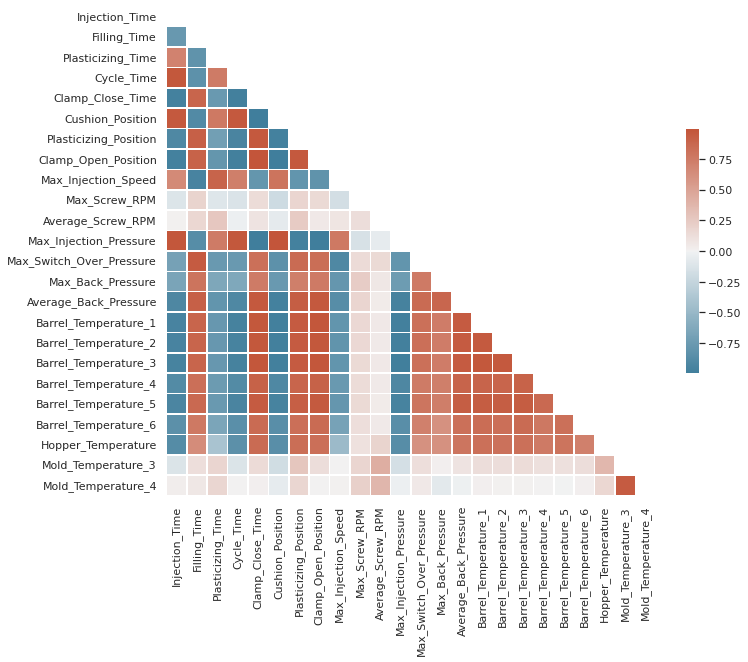

In [ ]:
CN7_P_rev_corr = CN7_P_rev.corr()

draw_seaborn_corr(CN7_P_rev_corr)

In [ ]:
CN7_P_rev_corr

,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
Injection_Time,1.000000,-0.765170,0.701975,0.974899,-0.969998,0.966450,-0.909216,-0.965781,0.659175,-0.115702,0.015082,0.981686,-0.688023,-0.661791,-0.913765,-0.947741,-0.944650,-0.952647,-0.882301,-0.928516,-0.833676,-0.873835,-0.117135,0.027659
Filling_Time,-0.765170,1.000000,-0.817145,-0.831227,0.890664,-0.891406,0.925373,0.905332,-0.947038,0.188787,0.166560,-0.868493,0.950348,0.799509,0.921995,0.890188,0.892640,0.889287,0.831693,0.865010,0.764960,0.642290,0.124552,0.064774
Plasticizing_Time,0.701975,-0.817145,1.000000,0.752503,-0.759584,0.767688,-0.713410,-0.791446,0.896865,-0.106647,0.269489,0.751577,-0.758125,-0.638816,-0.798851,-0.775431,-0.777348,-0.776896,-0.741117,-0.761112,-0.656587,-0.402319,0.182122,0.177107
Cycle_Time,0.974899,-0.831227,0.752503,1.000000,-0.974341,0.972903,-0.936239,-0.976184,0.729330,-0.128011,-0.024998,0.980188,-0.762200,-0.632388,-0.910130,-0.959978,-0.957250,-0.963194,-0.886004,-0.934803,-0.842408,-0.833605,-0.121651,0.004657
Clamp_Close_Time,-0.969998,0.890664,-0.759584,-0.974341,1.000000,-0.992662,0.972933,0.996809,-0.787704,0.139057,0.086982,-0.996548,0.821399,0.751736,0.967192,0.978872,0.977103,0.981598,0.911873,0.955593,0.854112,0.854156,0.144667,0.017244
Cushion_Position,0.966450,-0.891406,0.767688,0.972903,-0.992662,1.000000,-0.971365,-0.994841,0.797199,-0.199775,-0.068066,0.994250,-0.825311,-0.757182,-0.967620,-0.977299,-0.976815,-0.980436,-0.909381,-0.954533,-0.852259,-0.850916,-0.179522,-0.061505
Plasticizing_Position,-0.909216,0.925373,-0.713410,-0.936239,0.972933,-0.971365,1.000000,0.970552,-0.800967,0.180976,0.243348,-0.966107,0.853249,0.728164,0.939631,0.954482,0.952907,0.957238,0.888326,0.928767,0.830056,0.833848,0.280286,0.171493
Clamp_Open_Position,-0.965781,0.905332,-0.791446,-0.976184,0.996809,-0.994841,0.970552,1.000000,-0.815433,0.151956,0.055345,-0.995627,0.835367,0.757506,0.972571,0.981860,0.981095,0.984826,0.915486,0.959189,0.856038,0.833178,0.126815,0.007590
Max_Injection_Speed,0.659175,-0.947038,0.896865,0.729330,-0.787704,0.797199,-0.800967,-0.815433,1.000000,-0.168626,0.083501,0.766719,-0.907646,-0.785494,-0.861768,-0.799686,-0.804755,-0.799463,-0.757446,-0.781730,-0.677485,-0.478660,0.002230,0.010629
Max_Screw_RPM,-0.115702,0.188787,-0.106647,-0.128011,0.139057,-0.199775,0.180976,0.151956,-0.168626,1.000000,0.129912,-0.145721,0.144327,0.240584,0.183047,0.157945,0.158567,0.153522,0.136827,0.149343,0.121746,0.104353,0.183733,0.217126




*   **정상 데이터의 상관관계**


> 정상 데이터는 대부분의 변수가 변수 간 높은 상관관계를 보임. 따라서 정상 제품이 만들어지는데에는 많은 변수가 서로 연관되어 있음을 추측. 그 중, Max_Screw_RPM, Average_Screw_RPM, Mold_Temperature_3, Mold_Temperature_4는 다른 변수와 상관관계를 보이지 않음.






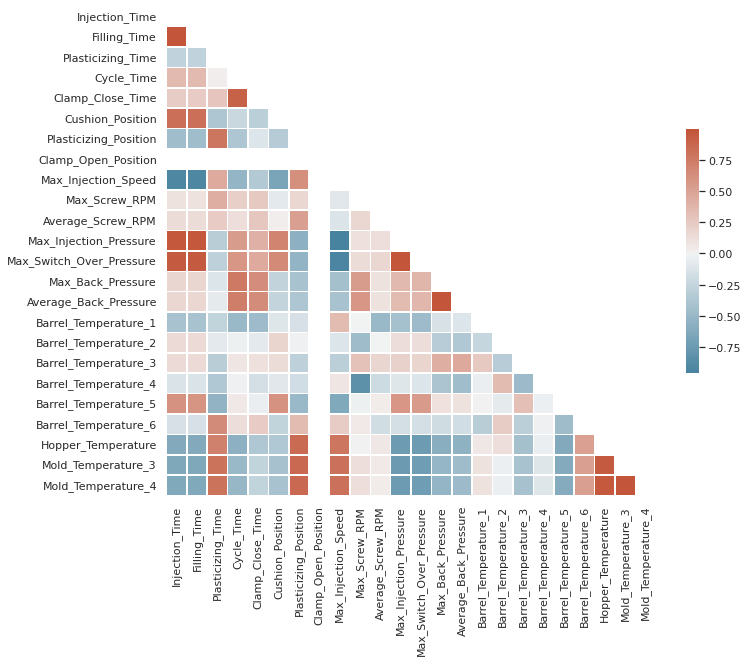

In [ ]:
CN7_F_rev_corr = CN7_F_rev.corr()

draw_seaborn_corr(CN7_F_rev_corr)

In [ ]:
CN7_F_rev_corr

,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
Injection_Time,1.000000,0.999992,-0.275267,0.350321,0.241880,0.830853,-0.459044,NaN,-0.914577,0.097086,0.138691,0.971725,0.960450,0.176684,0.165622,-0.407728,0.157535,0.152883,-0.127085,0.602444,-0.155128,-0.618036,-0.632288,-0.627267
Filling_Time,0.999992,1.000000,-0.274924,0.351565,0.242698,0.830062,-0.458778,NaN,-0.915211,0.098524,0.139610,0.971983,0.960769,0.178813,0.167699,-0.408051,0.157211,0.153750,-0.127449,0.601865,-0.155077,-0.618293,-0.632517,-0.627550
Plasticizing_Time,-0.275267,-0.274924,1.000000,0.022893,0.287234,-0.373141,0.792041,NaN,0.449566,0.428949,0.249218,-0.315016,-0.281140,-0.115115,-0.067806,-0.268376,-0.078312,-0.315438,-0.359092,-0.538569,0.652447,0.710544,0.803655,0.801656
Cycle_Time,0.350321,0.351565,0.022893,1.000000,0.908389,-0.222941,-0.376283,NaN,-0.521683,0.226047,0.122622,0.544150,0.580221,0.766355,0.738851,-0.494604,-0.019597,0.082336,-0.012782,0.060856,0.131648,-0.557927,-0.497773,-0.503711
Clamp_Close_Time,0.241880,0.242698,0.287234,0.908389,1.000000,-0.299695,-0.111382,NaN,-0.343610,0.264983,0.270750,0.414950,0.454662,0.637995,0.640483,-0.472934,-0.078607,0.112862,-0.158026,-0.038580,0.247381,-0.364448,-0.263619,-0.268598
Cushion_Position,0.830853,0.830062,-0.373141,-0.222941,-0.299695,1.000000,-0.326531,NaN,-0.663180,-0.075381,0.021666,0.695225,0.657360,-0.257066,-0.255165,-0.097266,0.191742,0.136265,-0.094112,0.609311,-0.264599,-0.359624,-0.418043,-0.409243
Plasticizing_Position,-0.459044,-0.458778,0.792041,-0.376283,-0.111382,-0.326531,1.000000,NaN,0.625955,0.171358,0.530765,-0.560647,-0.530437,-0.402998,-0.374513,-0.155426,-0.011259,-0.284731,-0.173132,-0.491439,0.346774,0.855571,0.867956,0.866738
Clamp_Open_Position,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Max_Injection_Speed,-0.914577,-0.915211,0.449566,-0.521683,-0.343610,-0.663180,0.625955,NaN,1.000000,-0.092296,-0.117817,-0.959641,-0.935293,-0.435553,-0.408372,0.342231,-0.110953,-0.296934,0.085080,-0.629033,0.238138,0.786713,0.809755,0.808746
Max_Screw_RPM,0.097086,0.098524,0.428949,0.226047,0.264983,-0.075381,0.171358,NaN,-0.092296,1.000000,0.169426,0.114628,0.135488,0.545006,0.586507,-0.003212,-0.463768,0.301942,-0.829075,-0.024139,0.044942,0.004294,0.124948,0.119704




*   **비정상 데이터의 상관관계**


> 정상 데이터에서 보이던 높은 상관관계가 사라짐. 상관관계도 음과 양이 불규칙적.
Clamp_Open_Position은 에러값이 나옴.





In [ ]:
abs(CN7_P_rev_corr - CN7_F_rev_corr)

,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
Injection_Time,0.000000,1.765162,0.977242,0.624578,1.211878,0.135597,0.450171,NaN,1.573751,0.212788,0.123608,0.009961,1.648473,0.838475,1.079387,0.540012,1.102185,1.105530,0.755216,1.530960,0.678548,0.255800,0.515153,0.654926
Filling_Time,1.765162,0.000000,0.542221,1.182792,0.647966,1.721468,1.384151,NaN,0.031827,0.090263,0.026949,1.840477,0.010420,0.620696,0.754297,1.298240,0.735429,0.735536,0.959142,0.263145,0.920037,1.260582,0.757069,0.692324
Plasticizing_Time,0.977242,0.542221,0.000000,0.729610,1.046818,1.140829,1.505451,NaN,0.447299,0.535596,0.020272,1.066592,0.476985,0.523701,0.731045,0.507055,0.699036,0.461458,0.382025,0.222543,1.309034,1.112863,0.621532,0.624549
Cycle_Time,0.624578,1.182792,0.729610,0.000000,1.882730,1.195844,0.559956,NaN,1.251013,0.354058,0.147620,0.436038,1.342422,1.398743,1.648981,0.465375,0.937653,1.045530,0.873222,0.995659,0.974056,0.275678,0.376122,0.508368
Clamp_Close_Time,1.211878,0.647966,1.046818,1.882730,0.000000,0.692966,1.084315,NaN,0.444094,0.125926,0.183768,1.411499,0.366737,0.113740,0.326709,1.451806,1.055711,0.868735,1.069899,0.994173,0.606731,1.218604,0.408286,0.285842
Cushion_Position,0.135597,1.721468,1.140829,1.195844,0.692966,0.000000,0.644834,NaN,1.460379,0.124393,0.089732,0.299025,1.482671,0.500116,0.712456,0.880033,1.168557,1.116700,0.815270,1.563843,0.587660,0.491292,0.238521,0.347738
Plasticizing_Position,0.450171,1.384151,1.505451,0.559956,1.084315,0.644834,0.000000,NaN,1.426922,0.009619,0.287417,0.405461,1.383686,1.131162,1.314143,1.109908,0.964166,1.241969,1.061458,1.420207,0.483282,0.021724,0.587670,0.695246
Clamp_Open_Position,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Max_Injection_Speed,1.573751,0.031827,0.447299,1.251013,0.444094,1.460379,1.426922,NaN,0.000000,0.076330,0.201318,1.726360,0.027647,0.349942,0.453396,1.141917,0.693802,0.502529,0.842525,0.152698,0.915623,1.265373,0.807525,0.798117
Max_Screw_RPM,0.212788,0.090263,0.535596,0.354058,0.125926,0.124393,0.009619,NaN,0.076330,0.000000,0.039514,0.260349,0.008839,0.304421,0.403460,0.161157,0.622335,0.148419,0.965902,0.173482,0.076805,0.100059,0.058785,0.097422




*   **|정상 상관관계 - 비정상 상관관계|**
> 비정상 데이터의 상관관계 중 높은 상관관계를 보이는 것은 문제가 있다고 생각하여, 정상 데이터와 비정상 데이터 상관관계 값의 차이를 확인.
그 중, 차이값이 1.6 이상인 변수를 확인. 
*   Injection_Time : Filling_Time, Max_Switch_Over_Pressure
*   Filling_Time : Cushion_Position, Max_Injection_Pressure
*   Cycle_Time : Clamp_Close_Time
*   Max_Injection_Speed : Max_Injection_Pressure
*   Max_Injection_Pressure : Max_Switch_Over_Pressure







### **산점도 확인**
위에서 정상-비정상 상관관계 값이 1.6 이상인 변수를 산점도로 비교해보았다.

In [ ]:
def scatter_plot(x_data_P, y_data_P, x_data_F, y_data_F):
  x1 = x_data_P
  y1 = y_data_P
  x2 = x_data_F
  y2 = y_data_F

  plt.scatter(x1,y1,color='r')
  plt.scatter(x2,y2,color='b')
  plt.show()

Text(0, 0.5, 'Max Switch Over Pressure')

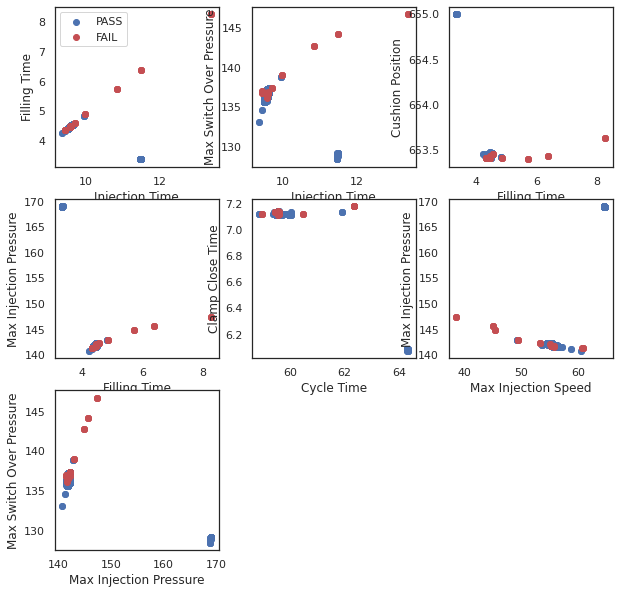

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(331)
plt.scatter(CN7_P_rev['Injection_Time'], CN7_P_rev['Filling_Time'], color='b')
plt.scatter(CN7_F_rev['Injection_Time'], CN7_F_rev['Filling_Time'], color='r')
plt.xlabel('Injection Time')
plt.ylabel('Filling Time')
plt.legend(('PASS','FAIL'), loc='upper left')
plt.subplot(332)
plt.scatter(CN7_P_rev['Injection_Time'], CN7_P_rev['Max_Switch_Over_Pressure'], color='b')
plt.scatter(CN7_F_rev['Injection_Time'], CN7_F_rev['Max_Switch_Over_Pressure'], color='r')
plt.xlabel('Injection Time')
plt.ylabel('Max Switch Over Pressure')
plt.subplot(333)
plt.scatter(CN7_P_rev['Filling_Time'], CN7_P_rev['Cushion_Position'], color='b')
plt.scatter(CN7_F_rev['Filling_Time'], CN7_F_rev['Cushion_Position'], color='r')
plt.xlabel('Filling Time')
plt.ylabel('Cushion Position')
plt.subplot(334)
plt.scatter(CN7_P_rev['Filling_Time'], CN7_P_rev['Max_Injection_Pressure'], color='b')
plt.scatter(CN7_F_rev['Filling_Time'], CN7_F_rev['Max_Injection_Pressure'], color='r')
plt.xlabel('Filling Time')
plt.ylabel('Max Injection Pressure')
plt.subplot(335)
plt.scatter(CN7_P_rev['Cycle_Time'], CN7_P_rev['Clamp_Close_Time'], color='b')
plt.scatter(CN7_F_rev['Cycle_Time'], CN7_F_rev['Clamp_Close_Time'], color='r')
plt.xlabel('Cycle Time')
plt.ylabel('Clamp Close Time')
plt.subplot(336)
plt.scatter(CN7_P_rev['Max_Injection_Speed'], CN7_P_rev['Max_Injection_Pressure'], color='b')
plt.scatter(CN7_F_rev['Max_Injection_Speed'], CN7_F_rev['Max_Injection_Pressure'], color='r')
plt.xlabel('Max Injection Speed')
plt.ylabel('Max Injection Pressure')
plt.subplot(337)
plt.scatter(CN7_P_rev['Max_Injection_Pressure'], CN7_P_rev['Max_Switch_Over_Pressure'], color='b')
plt.scatter(CN7_F_rev['Max_Injection_Pressure'], CN7_F_rev['Max_Switch_Over_Pressure'], color='r')
plt.xlabel('Max Injection Pressure')
plt.ylabel('Max Switch Over Pressure')

*   반대의 상관관계를 보이는 변수를 산점도로 비교해본 결과, 일정범위에서는 비슷한 데이터값을 보임. 하지만 범위가 넓어질수록 반대의 상관관계를 보임.
*   데이터가 겹침에도 비정상인 이유는 다른 변수에 의한 것으로 보임.



### **정상/비정상 박스플롯 비교**
CN7 데이터의 정상/비정상 데이터를 박스플롯으로 비교해보았다.

In [ ]:
def draw_box(data):
    fig, axes = plt.subplots(8, 3, figsize=(12, 32))
    k = 1
    for i in range(8): # 24개 칼럼이니까 4개씩 6개
        for j in range(3):
            sns.boxplot(x='PassOrFail', y=list(data)[k], data=data, ax=axes[i,j])
            k += 1
    plt.savefig(path + 'boxplot.jpg')

In [ ]:
CN7_boxplot = CN7.drop(['PART_NAME'], axis=1)

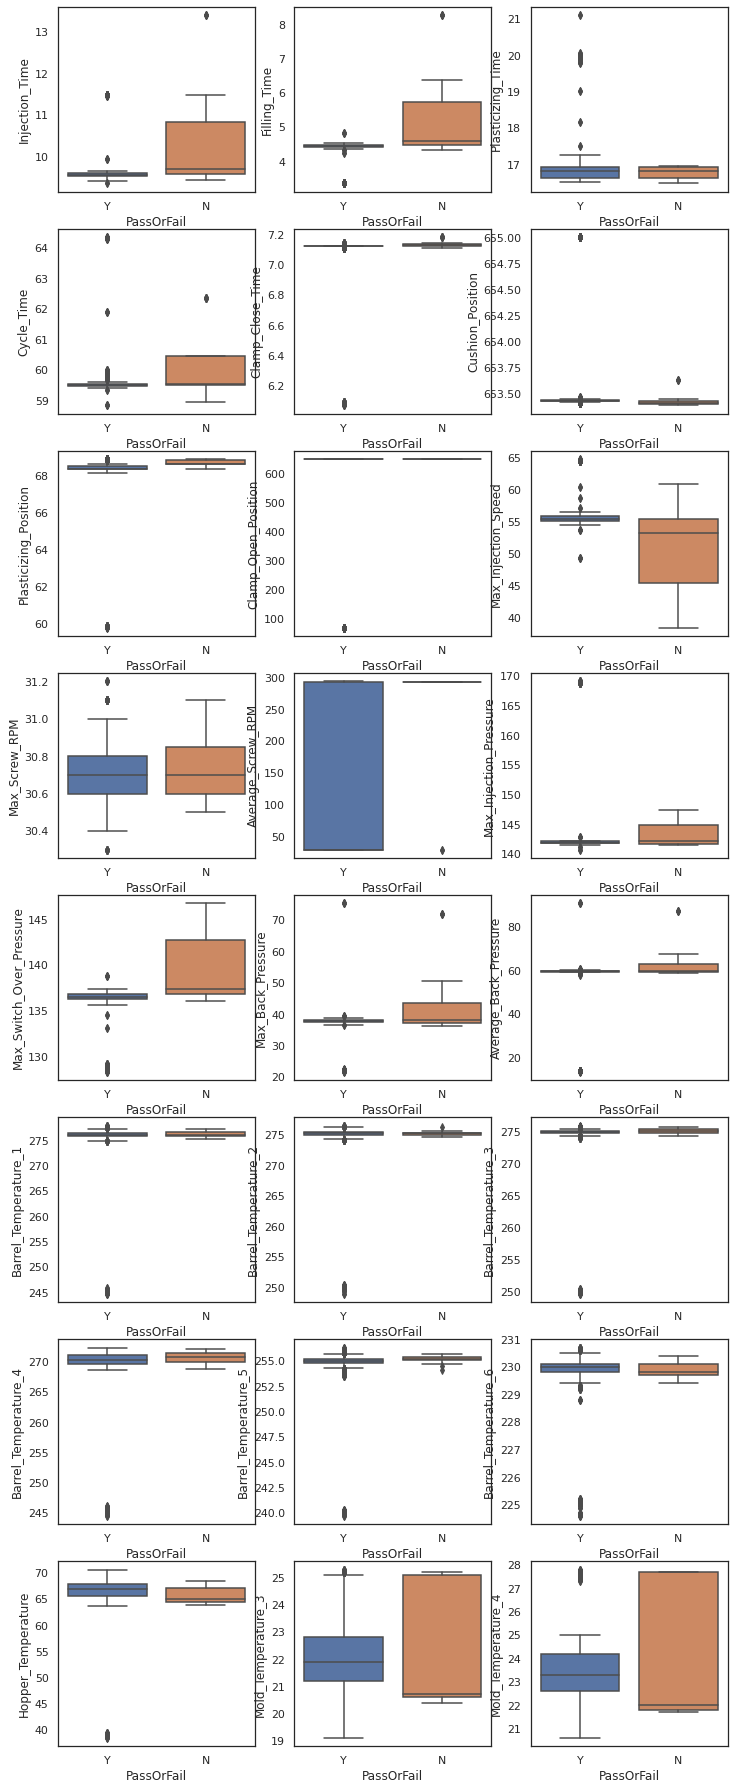

In [ ]:
draw_box(CN7_boxplot)

*   박스플롯 비교 결과 정상 데이터 대부분은 비정상 데이터보다 좁은 범위 안의 값을 갖는다.
*   정상 제품 제작을 위한 각 변수 별 범위를 가늠해볼 수 있다.
*   예외적으로 Average_Screw_RPM은 정상 데이터의 범위가 더 넓고 균일하게 나타난다. 
*   또한, 정상 데이터 개수가 더 많아서인지 정상 데이터의 outlier가 더 많이 보인다.





In [ ]:
def outliers_iqr(data):
  q1, q3 = np.percentile(data, [25, 75])

  iqr = q3 - q1
  lower_bound = q1 - (iqr * 1.5)
  upper_bound = q3 + (iqr * 1.5)

  return np.where((data > upper_bound)|(data < lower_bound))

In [ ]:
CN7_P_outlier=[]
for i in range(24):
  CN7_P_outlier.append(outliers_iqr(CN7_P_rev[list(CN7_P_rev)[i]])[0])

In [ ]:
for i in range(24):  
  print(list(CN7_P_rev)[i], 'outlier :', len(CN7_P_outlier[i]), '/',
        '%.2f%%' % (100 * len(CN7_P_outlier[i]) / len(CN7_P_rev[list(CN7_P_rev)[i]])))

Injection_Time outlier : 42 / 0.63%
Filling_Time outlier : 44 / 0.66%
Plasticizing_Time outlier : 44 / 0.66%
Cycle_Time outlier : 94 / 1.40%
Clamp_Close_Time outlier : 2486 / 37.12%
Cushion_Position outlier : 931 / 13.90%
Plasticizing_Position outlier : 394 / 5.88%
Clamp_Open_Position outlier : 36 / 0.54%
Max_Injection_Speed outlier : 50 / 0.75%
Max_Screw_RPM outlier : 44 / 0.66%
Average_Screw_RPM outlier : 0 / 0.00%
Max_Injection_Pressure outlier : 44 / 0.66%
Max_Switch_Over_Pressure outlier : 44 / 0.66%
Max_Back_Pressure outlier : 46 / 0.69%
Average_Back_Pressure outlier : 80 / 1.19%
Barrel_Temperature_1 outlier : 88 / 1.31%
Barrel_Temperature_2 outlier : 83 / 1.24%
Barrel_Temperature_3 outlier : 664 / 9.91%
Barrel_Temperature_4 outlier : 36 / 0.54%
Barrel_Temperature_5 outlier : 271 / 4.05%
Barrel_Temperature_6 outlier : 88 / 1.31%
Hopper_Temperature outlier : 36 / 0.54%
Mold_Temperature_3 outlier : 65 / 0.97%
Mold_Temperature_4 outlier : 358 / 5.35%


outlier 개수 계산 결과 : Clamp_Close_Time(37.12%), Cushion_Position(13.90%), Barrel_Temperature_3(9.91%), Plasticizing_Position(5.88%), Barrel_Temperature_5(4.05%)를 제외하고는 0~2% 사이의 outlier를 갖는다.

In [ ]:
original_percent = []
for i in range(24):
  original_percent.append('%.2f' % (100 * len(CN7_P_outlier[i]) 
  / len(CN7_P_rev[list(CN7_P_rev)[i]])))

### **Outlier Data Cleansing**


> outlier가 가장 많은 Clamp_Close_Time 데이터를 삭제하면서 outlier 정도를 조절해본다.



In [ ]:
newindex_CN7_P_rev = CN7_P_rev.reset_index()
newindex_CN7_P_rev = newindex_CN7_P_rev.drop(columns='index')

In [ ]:
CN7_P_rev.iloc[20:25,:]

,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
20,9.59,4.48,16.879999,59.560001,7.13,653.409973,68.830002,647.98999,55.400002,30.700001,292.399994,141.800003,136.899994,37.500000,59.400002,276.200012,275.000000,274.799988,270.100006,255.800003,229.600006,67.000000,24.900000,27.5
21,9.60,4.48,16.870001,59.580002,7.13,653.409973,68.839996,647.98999,55.299999,30.900000,292.399994,141.800003,136.899994,37.400002,59.299999,276.299988,275.200012,275.399994,271.000000,254.399994,230.199997,66.900002,25.000000,27.5
22,9.58,4.47,16.879999,59.560001,7.13,653.409973,68.860001,647.98999,55.400002,30.700001,292.500000,141.800003,136.899994,37.599998,59.400002,277.200012,275.500000,275.399994,271.399994,254.899994,229.800003,67.000000,24.900000,27.5
24,9.57,4.45,16.900000,59.520000,7.13,653.409973,68.839996,647.98999,55.599998,30.600000,292.399994,141.699997,136.399994,37.099998,59.099998,276.299988,275.200012,275.000000,271.000000,254.600006,230.300003,67.000000,24.799999,27.4
25,9.56,4.44,16.910000,59.520000,7.13,653.409973,68.839996,647.98999,55.799999,30.799999,292.500000,141.600006,136.100006,37.000000,59.099998,275.500000,276.000000,274.600006,270.399994,255.699997,229.800003,67.099998,24.799999,27.5


In [ ]:
newindex_CN7_P_rev.iloc[20:25, :]

,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
20,9.59,4.48,16.879999,59.560001,7.13,653.409973,68.830002,647.98999,55.400002,30.700001,292.399994,141.800003,136.899994,37.500000,59.400002,276.200012,275.000000,274.799988,270.100006,255.800003,229.600006,67.000000,24.900000,27.5
21,9.60,4.48,16.870001,59.580002,7.13,653.409973,68.839996,647.98999,55.299999,30.900000,292.399994,141.800003,136.899994,37.400002,59.299999,276.299988,275.200012,275.399994,271.000000,254.399994,230.199997,66.900002,25.000000,27.5
22,9.58,4.47,16.879999,59.560001,7.13,653.409973,68.860001,647.98999,55.400002,30.700001,292.500000,141.800003,136.899994,37.599998,59.400002,277.200012,275.500000,275.399994,271.399994,254.899994,229.800003,67.000000,24.900000,27.5
23,9.57,4.45,16.900000,59.520000,7.13,653.409973,68.839996,647.98999,55.599998,30.600000,292.399994,141.699997,136.399994,37.099998,59.099998,276.299988,275.200012,275.000000,271.000000,254.600006,230.300003,67.000000,24.799999,27.4
24,9.56,4.44,16.910000,59.520000,7.13,653.409973,68.839996,647.98999,55.799999,30.799999,292.500000,141.600006,136.100006,37.000000,59.099998,275.500000,276.000000,274.600006,270.399994,255.699997,229.800003,67.099998,24.799999,27.5


In [ ]:
Clamp_Close_Time_Outlier = outliers_iqr(newindex_CN7_P_rev['Clamp_Close_Time'])[0]
Clamp_Close_Time_Outlier

array([   0,    1,    2, ..., 6694, 6695, 6696])

In [ ]:
List_Clamp_Close_Time_Outlier = Clamp_Close_Time_Outlier.tolist()
print(List_Clamp_Close_Time_Outlier)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 32

*   Outlier 10% 제거

In [ ]:
import random
random_10 =  random.sample(List_Clamp_Close_Time_Outlier,248)
print(random_10)

[6378, 195, 3052, 4712, 57, 48, 4993, 6299, 6586, 6364, 1671, 3093, 3344, 6542, 1800, 6047, 5143, 3236, 6573, 3648, 3103, 6338, 6657, 5645, 5643, 5202, 3378, 2893, 5985, 3136, 3227, 6564, 6294, 5019, 3163, 4719, 1533, 6322, 3311, 317, 5500, 1648, 5277, 2952, 1917, 1375, 1649, 4982, 58, 3716, 6607, 6590, 6470, 2311, 3014, 5986, 3210, 6334, 4677, 5884, 6508, 6672, 3213, 6275, 3232, 5005, 1265, 6385, 1877, 1967, 5243, 5130, 6674, 3005, 1765, 926, 4558, 1380, 934, 3592, 3278, 5211, 6503, 4725, 913, 3171, 3196, 4123, 4506, 263, 2752, 3129, 3238, 1639, 4998, 5241, 3598, 6616, 1912, 2717, 353, 5139, 1881, 5253, 2316, 6477, 1553, 249, 1746, 3109, 3295, 5163, 4879, 6491, 1573, 3326, 3322, 356, 1621, 4995, 1830, 1938, 1873, 2305, 3153, 6536, 6, 198, 265, 6525, 1764, 3031, 1229, 64, 5970, 3023, 2753, 1749, 4980, 1642, 5650, 3157, 6097, 63, 5183, 6105, 367, 6519, 4979, 1930, 6585, 1330, 2720, 3584, 3365, 4953, 6373, 3645, 1772, 1755, 6680, 6355, 1810, 5123, 2601, 6455, 6494, 1633, 3154, 6518, 1883

In [ ]:
delete_10 = newindex_CN7_P_rev.drop(random_10)

In [ ]:
delete_10_outlier=[]
for i in range(24):
  delete_10_outlier.append(outliers_iqr(delete_10[list(delete_10)[i]])[0])

In [ ]:
for i in range(24):  
  print(list(delete_10)[i], 'outlier :', len(delete_10_outlier[i]), '/',
        '%.2f%%' % (100 * len(delete_10_outlier[i]) / len(delete_10[list(delete_10)[i]])))

Injection_Time outlier : 38 / 0.59%
Filling_Time outlier : 40 / 0.62%
Plasticizing_Time outlier : 40 / 0.62%
Cycle_Time outlier : 89 / 1.38%
Clamp_Close_Time outlier : 2238 / 34.70%
Cushion_Position outlier : 912 / 14.14%
Plasticizing_Position outlier : 32 / 0.50%
Clamp_Open_Position outlier : 32 / 0.50%
Max_Injection_Speed outlier : 46 / 0.71%
Max_Screw_RPM outlier : 44 / 0.68%
Average_Screw_RPM outlier : 0 / 0.00%
Max_Injection_Pressure outlier : 40 / 0.62%
Max_Switch_Over_Pressure outlier : 40 / 0.62%
Max_Back_Pressure outlier : 41 / 0.64%
Average_Back_Pressure outlier : 74 / 1.15%
Barrel_Temperature_1 outlier : 81 / 1.26%
Barrel_Temperature_2 outlier : 78 / 1.21%
Barrel_Temperature_3 outlier : 634 / 9.83%
Barrel_Temperature_4 outlier : 32 / 0.50%
Barrel_Temperature_5 outlier : 260 / 4.03%
Barrel_Temperature_6 outlier : 84 / 1.30%
Hopper_Temperature outlier : 32 / 0.50%
Mold_Temperature_3 outlier : 59 / 0.91%
Mold_Temperature_4 outlier : 343 / 5.32%


In [ ]:
delete_10_outlier_percent = []
for i in range(24):
  delete_10_outlier_percent.append('%.2f' % (100 * len(delete_10_outlier[i]) 
  / len(delete_10[list(delete_10)[i]])))



*   Outlier 20% 제거



In [ ]:
after_drop_random_10 = list(set(List_Clamp_Close_Time_Outlier)-set(random_10))
random_20 = random.sample(after_drop_random_10, 248)
delete_20 = delete_10.drop(random_20)

delete_20_outlier=[]
for i in range(24):
  delete_20_outlier.append(outliers_iqr(delete_20[list(delete_20)[i]])[0])

for i in range(24):  
  print(list(delete_20)[i], 'outlier :', len(delete_20_outlier[i]), '/',
      '%.2f%%' % (100 * len(delete_20_outlier[i]) / len(delete_20[list(delete_20)[i]])))

Injection_Time outlier : 36 / 0.58%
Filling_Time outlier : 38 / 0.61%
Plasticizing_Time outlier : 38 / 0.61%
Cycle_Time outlier : 84 / 1.35%
Clamp_Close_Time outlier : 1990 / 32.09%
Cushion_Position outlier : 892 / 14.38%
Plasticizing_Position outlier : 30 / 0.48%
Clamp_Open_Position outlier : 30 / 0.48%
Max_Injection_Speed outlier : 44 / 0.71%
Max_Screw_RPM outlier : 43 / 0.69%
Average_Screw_RPM outlier : 0 / 0.00%
Max_Injection_Pressure outlier : 38 / 0.61%
Max_Switch_Over_Pressure outlier : 38 / 0.61%
Max_Back_Pressure outlier : 38 / 0.61%
Average_Back_Pressure outlier : 71 / 1.14%
Barrel_Temperature_1 outlier : 78 / 1.26%
Barrel_Temperature_2 outlier : 71 / 1.14%
Barrel_Temperature_3 outlier : 44 / 0.71%
Barrel_Temperature_4 outlier : 30 / 0.48%
Barrel_Temperature_5 outlier : 247 / 3.98%
Barrel_Temperature_6 outlier : 82 / 1.32%
Hopper_Temperature outlier : 30 / 0.48%
Mold_Temperature_3 outlier : 0 / 0.00%
Mold_Temperature_4 outlier : 328 / 5.29%


In [ ]:
delete_20_outlier_percent = []
for i in range(24):
  delete_20_outlier_percent.append('%.2f' % (100 * len(delete_20_outlier[i]) 
  / len(delete_20[list(delete_20)[i]])))



*   Outlier 30% 제거



In [ ]:
after_drop_random_20 = list(set(after_drop_random_10)-set(random_20))
random_30 = random.sample(after_drop_random_20, 248)
delete_30 = delete_20.drop(random_30)

delete_30_outlier=[]
for i in range(24):
  delete_30_outlier.append(outliers_iqr(delete_30[list(delete_30)[i]])[0])

for i in range(24):  
  print(list(delete_30)[i], 'outlier :', len(delete_30_outlier[i]), '/',
        '%.2f%%' % (100 * len(delete_30_outlier[i]) / len(delete_30[list(delete_30)[i]])))

Injection_Time outlier : 34 / 0.57%
Filling_Time outlier : 34 / 0.57%
Plasticizing_Time outlier : 38 / 0.64%
Cycle_Time outlier : 80 / 1.34%
Clamp_Close_Time outlier : 1742 / 29.26%
Cushion_Position outlier : 874 / 14.68%
Plasticizing_Position outlier : 28 / 0.47%
Clamp_Open_Position outlier : 28 / 0.47%
Max_Injection_Speed outlier : 42 / 0.71%
Max_Screw_RPM outlier : 42 / 0.71%
Average_Screw_RPM outlier : 0 / 0.00%
Max_Injection_Pressure outlier : 36 / 0.60%
Max_Switch_Over_Pressure outlier : 36 / 0.60%
Max_Back_Pressure outlier : 36 / 0.60%
Average_Back_Pressure outlier : 69 / 1.16%
Barrel_Temperature_1 outlier : 73 / 1.23%
Barrel_Temperature_2 outlier : 68 / 1.14%
Barrel_Temperature_3 outlier : 590 / 9.91%
Barrel_Temperature_4 outlier : 28 / 0.47%
Barrel_Temperature_5 outlier : 237 / 3.98%
Barrel_Temperature_6 outlier : 78 / 1.31%
Hopper_Temperature outlier : 28 / 0.47%
Mold_Temperature_3 outlier : 0 / 0.00%
Mold_Temperature_4 outlier : 313 / 5.26%


In [ ]:
delete_30_outlier_percent = []
for i in range(24):
  delete_30_outlier_percent.append('%.2f' % (100 * len(delete_30_outlier[i]) 
  / len(delete_30[list(delete_30)[i]])))



*   Outlier 40% 제거



In [ ]:
after_drop_random_30 = list(set(after_drop_random_20)-set(random_30))
random_40 = random.sample(after_drop_random_30, 248)
delete_40 = delete_30.drop(random_40)

delete_40_outlier=[]
for i in range(24):
  delete_40_outlier.append(outliers_iqr(delete_40[list(delete_40)[i]])[0])

for i in range(24):  
  print(list(delete_40)[i], 'outlier :', len(delete_40_outlier[i]), '/',
        '%.2f%%' % (100 * len(delete_40_outlier[i]) / len(delete_40[list(delete_40)[i]])))

Injection_Time outlier : 29 / 0.51%
Filling_Time outlier : 29 / 0.51%
Plasticizing_Time outlier : 109 / 1.91%
Cycle_Time outlier : 74 / 1.30%
Clamp_Close_Time outlier : 1494 / 26.19%
Cushion_Position outlier : 860 / 15.07%
Plasticizing_Position outlier : 23 / 0.40%
Clamp_Open_Position outlier : 23 / 0.40%
Max_Injection_Speed outlier : 37 / 0.65%
Max_Screw_RPM outlier : 40 / 0.70%
Average_Screw_RPM outlier : 0 / 0.00%
Max_Injection_Pressure outlier : 31 / 0.54%
Max_Switch_Over_Pressure outlier : 31 / 0.54%
Max_Back_Pressure outlier : 62 / 1.09%
Average_Back_Pressure outlier : 63 / 1.10%
Barrel_Temperature_1 outlier : 68 / 1.19%
Barrel_Temperature_2 outlier : 57 / 1.00%
Barrel_Temperature_3 outlier : 567 / 9.94%
Barrel_Temperature_4 outlier : 23 / 0.40%
Barrel_Temperature_5 outlier : 224 / 3.93%
Barrel_Temperature_6 outlier : 71 / 1.24%
Hopper_Temperature outlier : 23 / 0.40%
Mold_Temperature_3 outlier : 0 / 0.00%
Mold_Temperature_4 outlier : 305 / 5.35%


In [ ]:
delete_40_outlier_percent = []
for i in range(24):
  delete_40_outlier_percent.append('%.2f' % (100 * len(delete_40_outlier[i]) 
  / len(delete_40[list(delete_40)[i]])))

In [ ]:
delete_40

,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
0,9.60,4.48,16.910000,59.580002,7.13,653.409973,68.839996,647.98999,55.299999,30.799999,292.500000,141.800003,136.899994,37.500000,59.299999,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,67.199997,24.799999,27.600000
2,9.58,4.46,16.900000,59.580002,7.13,653.409973,68.839996,647.98999,55.599998,30.900000,292.500000,141.699997,136.399994,37.700001,59.400002,276.299988,275.299988,275.200012,271.399994,255.000000,230.000000,67.500000,25.000000,27.600000
4,9.57,4.45,16.910000,59.520000,7.14,653.409973,68.830002,647.98999,55.700001,30.799999,292.500000,141.600006,136.399994,37.099998,59.099998,275.700012,274.899994,274.799988,270.799988,255.399994,230.100006,66.699997,24.799999,27.500000
5,9.56,4.45,16.900000,59.520000,7.14,653.409973,68.839996,647.98999,55.700001,30.700001,292.500000,141.600006,136.300003,36.900002,59.000000,276.200012,275.200012,274.500000,270.299988,255.000000,230.100006,67.000000,25.000000,27.600000
7,9.58,4.47,16.920000,59.520000,7.13,653.409973,68.849998,647.98999,55.400002,30.700001,292.399994,141.800003,136.699997,37.000000,59.099998,276.100006,275.000000,275.299988,269.000000,255.399994,230.000000,66.900002,24.799999,27.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6691,9.57,4.46,16.629999,59.520000,7.11,653.419983,68.320000,647.98999,55.099998,30.799999,29.200001,142.100006,136.600006,37.799999,59.700001,276.299988,275.100006,275.399994,269.600006,255.300003,230.199997,66.500000,21.000000,22.400000
6692,9.58,4.46,16.670000,59.520000,7.11,653.429993,68.339996,647.98999,55.200001,30.600000,29.200001,142.199997,136.399994,37.900002,59.700001,275.799988,275.500000,275.500000,269.500000,255.000000,230.199997,66.000000,21.000000,22.400000
6693,9.60,4.49,16.650000,59.540001,7.11,653.429993,68.320000,647.98999,54.900002,30.799999,29.200001,142.100006,136.899994,38.099998,59.799999,276.100006,275.899994,274.899994,269.700012,254.600006,229.600006,65.400002,21.000000,22.400000
6695,9.60,4.48,16.650000,59.560001,7.11,653.429993,68.349998,647.98999,55.000000,30.700001,29.200001,142.100006,136.800003,38.400002,59.900002,275.799988,275.299988,275.500000,270.700012,254.899994,230.000000,66.099998,21.000000,22.400000




*   Outlier 50% 제거



In [ ]:
after_drop_random_40 = list(set(after_drop_random_30)-set(random_40))
random_50 = random.sample(after_drop_random_40, 248)
delete_50 = delete_40.drop(random_50)

delete_50_outlier=[]
for i in range(24):
  delete_50_outlier.append(outliers_iqr(delete_50[list(delete_50)[i]])[0])

for i in range(24):  
  print(list(delete_50)[i], 'outlier :', len(delete_50_outlier[i]), '/',
        '%.2f%%' % (100 * len(delete_50_outlier[i]) / len(delete_50[list(delete_50)[i]])))

Injection_Time outlier : 27 / 0.49%
Filling_Time outlier : 27 / 0.49%
Plasticizing_Time outlier : 600 / 11.00%
Cycle_Time outlier : 63 / 1.15%
Clamp_Close_Time outlier : 1246 / 22.83%
Cushion_Position outlier : 846 / 15.50%
Plasticizing_Position outlier : 21 / 0.38%
Clamp_Open_Position outlier : 21 / 0.38%
Max_Injection_Speed outlier : 35 / 0.64%
Max_Screw_RPM outlier : 40 / 0.73%
Average_Screw_RPM outlier : 0 / 0.00%
Max_Injection_Pressure outlier : 29 / 0.53%
Max_Switch_Over_Pressure outlier : 29 / 0.53%
Max_Back_Pressure outlier : 60 / 1.10%
Average_Back_Pressure outlier : 33 / 0.60%
Barrel_Temperature_1 outlier : 64 / 1.17%
Barrel_Temperature_2 outlier : 53 / 0.97%
Barrel_Temperature_3 outlier : 540 / 9.90%
Barrel_Temperature_4 outlier : 21 / 0.38%
Barrel_Temperature_5 outlier : 212 / 3.88%
Barrel_Temperature_6 outlier : 69 / 1.26%
Hopper_Temperature outlier : 21 / 0.38%
Mold_Temperature_3 outlier : 0 / 0.00%
Mold_Temperature_4 outlier : 293 / 5.37%


In [ ]:
delete_50_outlier_percent = []
for i in range(24):
  delete_50_outlier_percent.append('%.2f' % (100 * len(delete_50_outlier[i]) 
  / len(delete_50[list(delete_50)[i]])))



*   Outlier 60% 제거



In [ ]:
after_drop_random_50 = list(set(after_drop_random_40)-set(random_50))
random_60 = random.sample(after_drop_random_50, 248)
delete_60 = delete_50.drop(random_60)

delete_60_outlier=[]
for i in range(24):
  delete_60_outlier.append(outliers_iqr(delete_60[list(delete_60)[i]])[0])

for i in range(24):  
  print(list(delete_60)[i], 'outlier :', len(delete_60_outlier[i]), '/',
        '%.2f%%' % (100 * len(delete_60_outlier[i]) / len(delete_60[list(delete_60)[i]])))

Injection_Time outlier : 19 / 0.36%
Filling_Time outlier : 19 / 0.36%
Plasticizing_Time outlier : 530 / 10.17%
Cycle_Time outlier : 52 / 1.00%
Clamp_Close_Time outlier : 998 / 19.16%
Cushion_Position outlier : 827 / 15.88%
Plasticizing_Position outlier : 15 / 0.29%
Clamp_Open_Position outlier : 15 / 0.29%
Max_Injection_Speed outlier : 27 / 0.52%
Max_Screw_RPM outlier : 753 / 14.46%
Average_Screw_RPM outlier : 0 / 0.00%
Max_Injection_Pressure outlier : 21 / 0.40%
Max_Switch_Over_Pressure outlier : 21 / 0.40%
Max_Back_Pressure outlier : 52 / 1.00%
Average_Back_Pressure outlier : 25 / 0.48%
Barrel_Temperature_1 outlier : 57 / 1.09%
Barrel_Temperature_2 outlier : 45 / 0.86%
Barrel_Temperature_3 outlier : 504 / 9.68%
Barrel_Temperature_4 outlier : 15 / 0.29%
Barrel_Temperature_5 outlier : 199 / 3.82%
Barrel_Temperature_6 outlier : 61 / 1.17%
Hopper_Temperature outlier : 15 / 0.29%
Mold_Temperature_3 outlier : 0 / 0.00%
Mold_Temperature_4 outlier : 283 / 5.43%


In [ ]:
delete_60_outlier_percent = []
for i in range(24):
  delete_60_outlier_percent.append('%.2f' % (100 * len(delete_60_outlier[i]) 
  / len(delete_60[list(delete_60)[i]])))



*   Outlier 70% 제거



In [ ]:
after_drop_random_60 = list(set(after_drop_random_50)-set(random_60))
random_70 = random.sample(after_drop_random_60, 248)
delete_70 = delete_60.drop(random_70)

delete_70_outlier=[]
for i in range(24):
  delete_70_outlier.append(outliers_iqr(delete_70[list(delete_70)[i]])[0])

for i in range(24):  
  print(list(delete_70)[i], 'outlier :', len(delete_70_outlier[i]), '/',
        '%.2f%%' % (100 * len(delete_70_outlier[i]) / len(delete_70[list(delete_70)[i]])))

Injection_Time outlier : 15 / 0.30%
Filling_Time outlier : 15 / 0.30%
Plasticizing_Time outlier : 769 / 15.50%
Cycle_Time outlier : 46 / 0.93%
Clamp_Close_Time outlier : 750 / 15.12%
Cushion_Position outlier : 811 / 16.35%
Plasticizing_Position outlier : 12 / 0.24%
Clamp_Open_Position outlier : 12 / 0.24%
Max_Injection_Speed outlier : 23 / 0.46%
Max_Screw_RPM outlier : 702 / 14.15%
Average_Screw_RPM outlier : 0 / 0.00%
Max_Injection_Pressure outlier : 17 / 0.34%
Max_Switch_Over_Pressure outlier : 17 / 0.34%
Max_Back_Pressure outlier : 47 / 0.95%
Average_Back_Pressure outlier : 21 / 0.42%
Barrel_Temperature_1 outlier : 50 / 1.01%
Barrel_Temperature_2 outlier : 41 / 0.83%
Barrel_Temperature_3 outlier : 24 / 0.48%
Barrel_Temperature_4 outlier : 12 / 0.24%
Barrel_Temperature_5 outlier : 189 / 3.81%
Barrel_Temperature_6 outlier : 57 / 1.15%
Hopper_Temperature outlier : 12 / 0.24%
Mold_Temperature_3 outlier : 0 / 0.00%
Mold_Temperature_4 outlier : 274 / 5.52%


In [ ]:
delete_70_outlier_percent = []
for i in range(24):
  delete_70_outlier_percent.append('%.2f' % (100 * len(delete_70_outlier[i]) 
  / len(delete_70[list(delete_70)[i]])))



*   Outlier 80% 제거



In [ ]:
after_drop_random_70 = list(set(after_drop_random_60)-set(random_70))
random_80 = random.sample(after_drop_random_70, 248)
delete_80 = delete_70.drop(random_80)

delete_80_outlier=[]
for i in range(24):
  delete_80_outlier.append(outliers_iqr(delete_80[list(delete_80)[i]])[0])

for i in range(24):  
  print(list(delete_80)[i], 'outlier :', len(delete_80_outlier[i]), '/',
        '%.2f%%' % (100 * len(delete_80_outlier[i]) / len(delete_80[list(delete_80)[i]])))

Injection_Time outlier : 11 / 0.23%
Filling_Time outlier : 11 / 0.23%
Plasticizing_Time outlier : 670 / 14.22%
Cycle_Time outlier : 40 / 0.85%
Clamp_Close_Time outlier : 502 / 10.65%
Cushion_Position outlier : 784 / 16.63%
Plasticizing_Position outlier : 9 / 0.19%
Clamp_Open_Position outlier : 9 / 0.19%
Max_Injection_Speed outlier : 19 / 0.40%
Max_Screw_RPM outlier : 659 / 13.98%
Average_Screw_RPM outlier : 0 / 0.00%
Max_Injection_Pressure outlier : 13 / 0.28%
Max_Switch_Over_Pressure outlier : 13 / 0.28%
Max_Back_Pressure outlier : 13 / 0.28%
Average_Back_Pressure outlier : 17 / 0.36%
Barrel_Temperature_1 outlier : 45 / 0.95%
Barrel_Temperature_2 outlier : 34 / 0.72%
Barrel_Temperature_3 outlier : 451 / 9.57%
Barrel_Temperature_4 outlier : 9 / 0.19%
Barrel_Temperature_5 outlier : 179 / 3.80%
Barrel_Temperature_6 outlier : 53 / 1.12%
Hopper_Temperature outlier : 20 / 0.42%
Mold_Temperature_3 outlier : 9 / 0.19%
Mold_Temperature_4 outlier : 255 / 5.41%


In [ ]:
delete_80_outlier_percent = []
for i in range(24):
  delete_80_outlier_percent.append('%.2f' % (100 * len(delete_80_outlier[i]) 
  / len(delete_80[list(delete_80)[i]])))



*   Outlier 90% 제거



In [ ]:
after_drop_random_80 = list(set(after_drop_random_70)-set(random_80))
random_90 = random.sample(after_drop_random_80, 248)
delete_90 = delete_80.drop(random_90)

delete_90_outlier=[]
for i in range(24):
  delete_90_outlier.append(outliers_iqr(delete_90[list(delete_90)[i]])[0])

for i in range(24):  
  print(list(delete_90)[i], 'outlier :', len(delete_90_outlier[i]), '/',
        '%.2f%%' % (100 * len(delete_90_outlier[i]) / len(delete_90[list(delete_90)[i]])))

Injection_Time outlier : 6 / 0.13%
Filling_Time outlier : 6 / 0.13%
Plasticizing_Time outlier : 673 / 15.07%
Cycle_Time outlier : 33 / 0.74%
Clamp_Close_Time outlier : 254 / 5.69%
Cushion_Position outlier : 758 / 16.98%
Plasticizing_Position outlier : 4 / 0.09%
Clamp_Open_Position outlier : 4 / 0.09%
Max_Injection_Speed outlier : 14 / 0.31%
Max_Screw_RPM outlier : 610 / 13.66%
Average_Screw_RPM outlier : 0 / 0.00%
Max_Injection_Pressure outlier : 8 / 0.18%
Max_Switch_Over_Pressure outlier : 8 / 0.18%
Max_Back_Pressure outlier : 8 / 0.18%
Average_Back_Pressure outlier : 38 / 0.85%
Barrel_Temperature_1 outlier : 37 / 0.83%
Barrel_Temperature_2 outlier : 26 / 0.58%
Barrel_Temperature_3 outlier : 417 / 9.34%
Barrel_Temperature_4 outlier : 4 / 0.09%
Barrel_Temperature_5 outlier : 169 / 3.78%
Barrel_Temperature_6 outlier : 48 / 1.08%
Hopper_Temperature outlier : 14 / 0.31%
Mold_Temperature_3 outlier : 6 / 0.13%
Mold_Temperature_4 outlier : 237 / 5.31%


In [ ]:
delete_90_outlier_percent = []
for i in range(24):
  delete_90_outlier_percent.append('%.2f' % (100 * len(delete_90_outlier[i]) 
  / len(delete_90[list(delete_90)[i]])))



*   Outlier 100% 제거



In [ ]:
after_drop_random_90 = list(set(after_drop_random_80)-set(random_90))
print(len(after_drop_random_90))

random_100 = random.sample(after_drop_random_90, 254)
delete_100 = delete_90.drop(random_100)

delete_100_outlier=[]
for i in range(24):
  delete_100_outlier.append(outliers_iqr(delete_100[list(delete_100)[i]])[0])

for i in range(24):  
  print(list(delete_100)[i], 'outlier :', len(delete_100_outlier[i]), '/',
      '%.2f%%' % (100 * len(delete_100_outlier[i]) / len(delete_100[list(delete_100)[i]])))

254
Injection_Time outlier : 2 / 0.05%
Filling_Time outlier : 2 / 0.05%
Plasticizing_Time outlier : 522 / 12.40%
Cycle_Time outlier : 26 / 0.62%
Clamp_Close_Time outlier : 0 / 0.00%
Cushion_Position outlier : 738 / 17.53%
Plasticizing_Position outlier : 0 / 0.00%
Clamp_Open_Position outlier : 0 / 0.00%
Max_Injection_Speed outlier : 10 / 0.24%
Max_Screw_RPM outlier : 24 / 0.57%
Average_Screw_RPM outlier : 0 / 0.00%
Max_Injection_Pressure outlier : 4 / 0.09%
Max_Switch_Over_Pressure outlier : 4 / 0.09%
Max_Back_Pressure outlier : 4 / 0.09%
Average_Back_Pressure outlier : 20 / 0.47%
Barrel_Temperature_1 outlier : 32 / 0.76%
Barrel_Temperature_2 outlier : 20 / 0.47%
Barrel_Temperature_3 outlier : 389 / 9.24%
Barrel_Temperature_4 outlier : 0 / 0.00%
Barrel_Temperature_5 outlier : 158 / 3.75%
Barrel_Temperature_6 outlier : 8 / 0.19%
Hopper_Temperature outlier : 32 / 0.76%
Mold_Temperature_3 outlier : 6 / 0.14%
Mold_Temperature_4 outlier : 220 / 5.22%


In [ ]:
delete_100_outlier_percent = []
for i in range(24):
  delete_100_outlier_percent.append('%.2f' % (100 * len(delete_100_outlier[i]) 
  / len(delete_100[list(delete_100)[i]])))



*   Data Cleansing 종합



In [ ]:
cname = ['Injection Time', 'Filling Time', 'Plasticizing Time', 'Cycle Time',
         'Clamp Close Time', 'Cushion Position', 'Plasticizing Position', 
         'Clamp Open Position', 'Max Injection Speed',
         'Max Screw RPM', 'Average Screw RPM', 'Max Injection Pressure', 'Max Switch Over Pressure',
         'Max Back Pressure', 'Average Back Pressure', 'Barrel Temp 1',
         'Barrel Temp 2', 'Barrel Temp 3', 'Barrel Temp 4', 'Barrel Temp 5',
         'Barrel Temp 6', 'Hopper Temp', 'Mold Temp 3', 'Mold Temp 4']
rname = ['original', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%']
data_cleansing = pd.DataFrame([original_percent,delete_10_outlier_percent,
                               delete_20_outlier_percent,
                               delete_30_outlier_percent,
                               delete_40_outlier_percent,
                               delete_50_outlier_percent,
                               delete_60_outlier_percent,
                               delete_70_outlier_percent,
                               delete_80_outlier_percent,
                               delete_90_outlier_percent,
                               delete_100_outlier_percent],
                              columns=cname, index=rname)
data_cleansing

,Injection Time,Filling Time,Plasticizing Time,Cycle Time,Clamp Close Time,Cushion Position,Plasticizing Position,Clamp Open Position,Max Injection Speed,Max Screw RPM,Average Screw RPM,Max Injection Pressure,Max Switch Over Pressure,Max Back Pressure,Average Back Pressure,Barrel Temp 1,Barrel Temp 2,Barrel Temp 3,Barrel Temp 4,Barrel Temp 5,Barrel Temp 6,Hopper Temp,Mold Temp 3,Mold Temp 4
original,0.63,0.66,0.66,1.40,37.12,13.90,5.88,0.54,0.75,0.66,0.00,0.66,0.66,0.69,1.19,1.31,1.24,9.91,0.54,4.05,1.31,0.54,0.97,5.35
10%,0.59,0.62,0.62,1.38,34.70,14.14,0.50,0.50,0.71,0.68,0.00,0.62,0.62,0.64,1.15,1.26,1.21,9.83,0.50,4.03,1.30,0.50,0.91,5.32
20%,0.58,0.61,0.61,1.35,32.09,14.38,0.48,0.48,0.71,0.69,0.00,0.61,0.61,0.61,1.14,1.26,1.14,0.71,0.48,3.98,1.32,0.48,0.00,5.29
30%,0.57,0.57,0.64,1.34,29.26,14.68,0.47,0.47,0.71,0.71,0.00,0.60,0.60,0.60,1.16,1.23,1.14,9.91,0.47,3.98,1.31,0.47,0.00,5.26
40%,0.51,0.51,1.91,1.30,26.19,15.07,0.40,0.40,0.65,0.70,0.00,0.54,0.54,1.09,1.10,1.19,1.00,9.94,0.40,3.93,1.24,0.40,0.00,5.35
50%,0.49,0.49,11.00,1.15,22.83,15.50,0.38,0.38,0.64,0.73,0.00,0.53,0.53,1.10,0.60,1.17,0.97,9.90,0.38,3.88,1.26,0.38,0.00,5.37
60%,0.36,0.36,10.17,1.00,19.16,15.88,0.29,0.29,0.52,14.46,0.00,0.40,0.40,1.00,0.48,1.09,0.86,9.68,0.29,3.82,1.17,0.29,0.00,5.43
70%,0.30,0.30,15.50,0.93,15.12,16.35,0.24,0.24,0.46,14.15,0.00,0.34,0.34,0.95,0.42,1.01,0.83,0.48,0.24,3.81,1.15,0.24,0.00,5.52
80%,0.23,0.23,14.22,0.85,10.65,16.63,0.19,0.19,0.40,13.98,0.00,0.28,0.28,0.28,0.36,0.95,0.72,9.57,0.19,3.80,1.12,0.42,0.19,5.41
90%,0.13,0.13,15.07,0.74,5.69,16.98,0.09,0.09,0.31,13.66,0.00,0.18,0.18,0.18,0.85,0.83,0.58,9.34,0.09,3.78,1.08,0.31,0.13,5.31


In [ ]:
data_cleansing = data_cleansing.astype('float')

In [ ]:
def data_cleansing_line_plot(data): 
    fig, ax = plt.subplots(6, 4, figsize=(16, 24)) #얘내를 하나로 합쳐서 그려볼수는 없을까?
    k = 0
    for i in range(6): # 24개 칼럼이니까 4개씩 6개
        for j in range(4):
            ax[i, j].plot(data[list(data)[k]])
            ax[i, j].set_title(list(data)[k])
            k += 1
    plt.show()

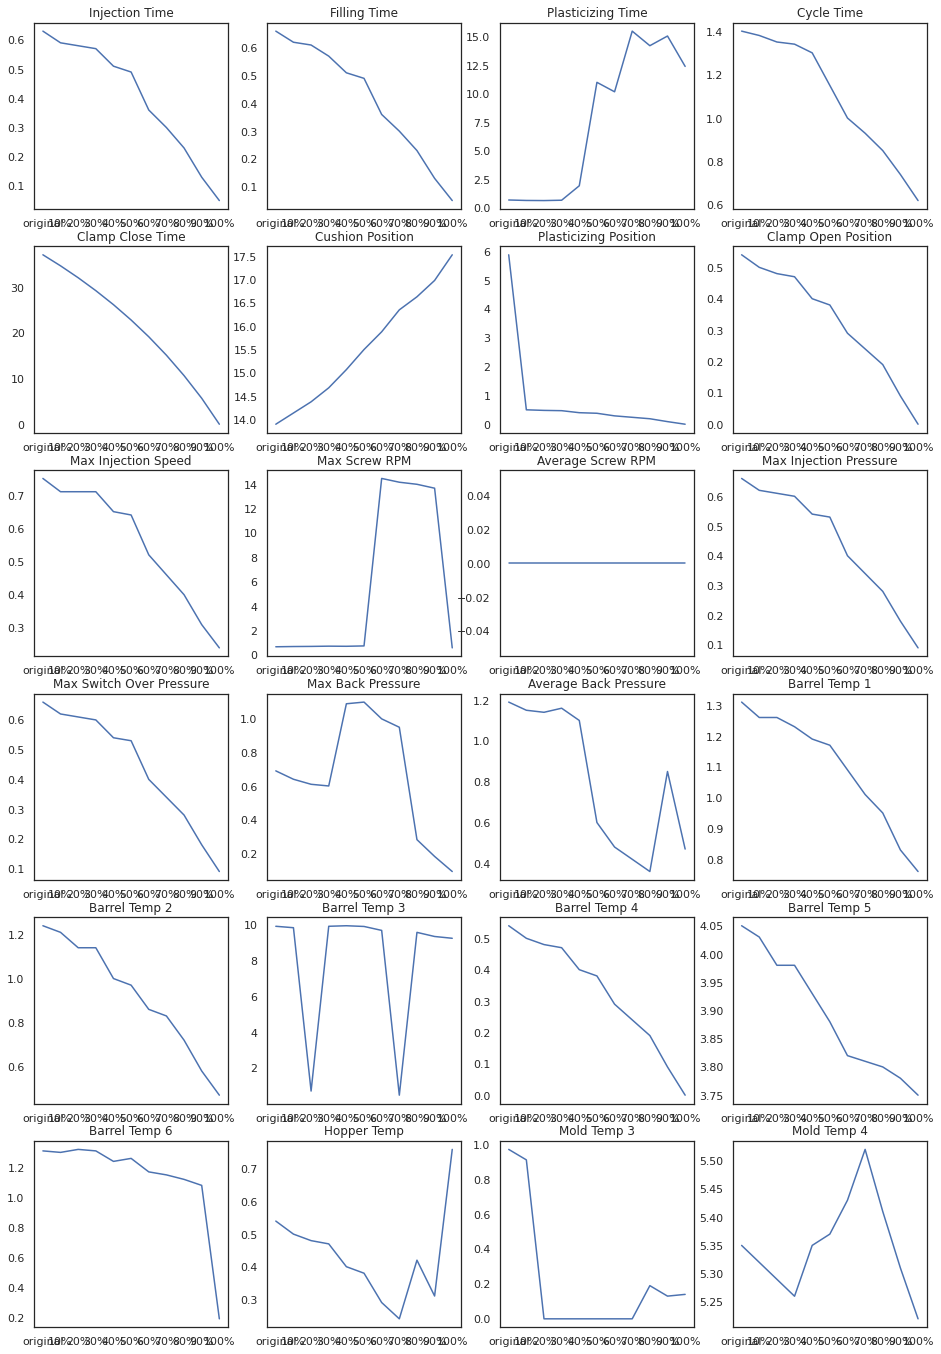

In [ ]:
data_cleansing_line_plot(data_cleansing) 

In [ ]:
delete_40

,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
0,9.60,4.48,16.910000,59.580002,7.13,653.409973,68.839996,647.98999,55.299999,30.799999,292.500000,141.800003,136.899994,37.500000,59.299999,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,67.199997,24.799999,27.600000
2,9.58,4.46,16.900000,59.580002,7.13,653.409973,68.839996,647.98999,55.599998,30.900000,292.500000,141.699997,136.399994,37.700001,59.400002,276.299988,275.299988,275.200012,271.399994,255.000000,230.000000,67.500000,25.000000,27.600000
4,9.57,4.45,16.910000,59.520000,7.14,653.409973,68.830002,647.98999,55.700001,30.799999,292.500000,141.600006,136.399994,37.099998,59.099998,275.700012,274.899994,274.799988,270.799988,255.399994,230.100006,66.699997,24.799999,27.500000
5,9.56,4.45,16.900000,59.520000,7.14,653.409973,68.839996,647.98999,55.700001,30.700001,292.500000,141.600006,136.300003,36.900002,59.000000,276.200012,275.200012,274.500000,270.299988,255.000000,230.100006,67.000000,25.000000,27.600000
7,9.58,4.47,16.920000,59.520000,7.13,653.409973,68.849998,647.98999,55.400002,30.700001,292.399994,141.800003,136.699997,37.000000,59.099998,276.100006,275.000000,275.299988,269.000000,255.399994,230.000000,66.900002,24.799999,27.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6691,9.57,4.46,16.629999,59.520000,7.11,653.419983,68.320000,647.98999,55.099998,30.799999,29.200001,142.100006,136.600006,37.799999,59.700001,276.299988,275.100006,275.399994,269.600006,255.300003,230.199997,66.500000,21.000000,22.400000
6692,9.58,4.46,16.670000,59.520000,7.11,653.429993,68.339996,647.98999,55.200001,30.600000,29.200001,142.199997,136.399994,37.900002,59.700001,275.799988,275.500000,275.500000,269.500000,255.000000,230.199997,66.000000,21.000000,22.400000
6693,9.60,4.49,16.650000,59.540001,7.11,653.429993,68.320000,647.98999,54.900002,30.799999,29.200001,142.100006,136.899994,38.099998,59.799999,276.100006,275.899994,274.899994,269.700012,254.600006,229.600006,65.400002,21.000000,22.400000
6695,9.60,4.48,16.650000,59.560001,7.11,653.429993,68.349998,647.98999,55.000000,30.700001,29.200001,142.100006,136.800003,38.400002,59.900002,275.799988,275.299988,275.500000,270.700012,254.899994,230.000000,66.099998,21.000000,22.400000


* Outlier를 40% 제거했을 때 가장 적합하다고 판단하여 outlier를 40% 제거했을 때 violin plot을 그려봄

In [ ]:
def outlier_violin(data):
    fig, axes = plt.subplots(8, 3, figsize=(12, 32))
    k = 0
    for i in range(8): # 24개 칼럼이니까 4개씩 6개
        for j in range(3):
          axes[i, j].violinplot(data[list(data)[k]])
          axes[i, j].set_title(list(data)[k])
          k += 1

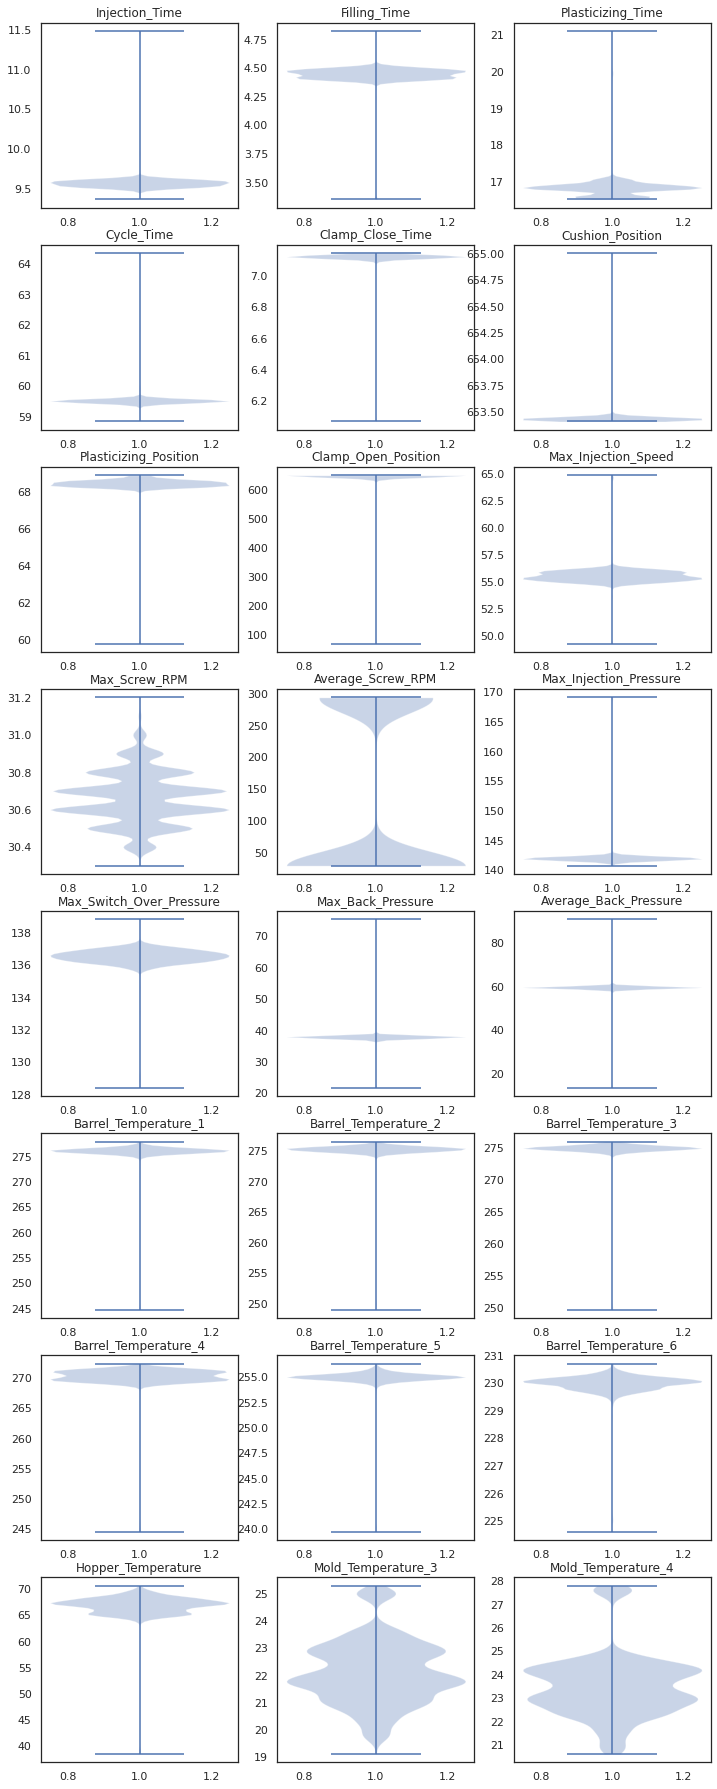

In [ ]:
outlier_violin(delete_40)

### **Violin Plot**

In [ ]:
def draw_violin(data):
    fig, axes = plt.subplots(8, 3, figsize=(12, 32))
    k = 1
    for i in range(8): # 24개 칼럼이니까 4개씩 6개
        for j in range(3):
            sns.violinplot(x='PassOrFail', y=list(data)[k], data=data, ax=axes[i,j])
            k += 1

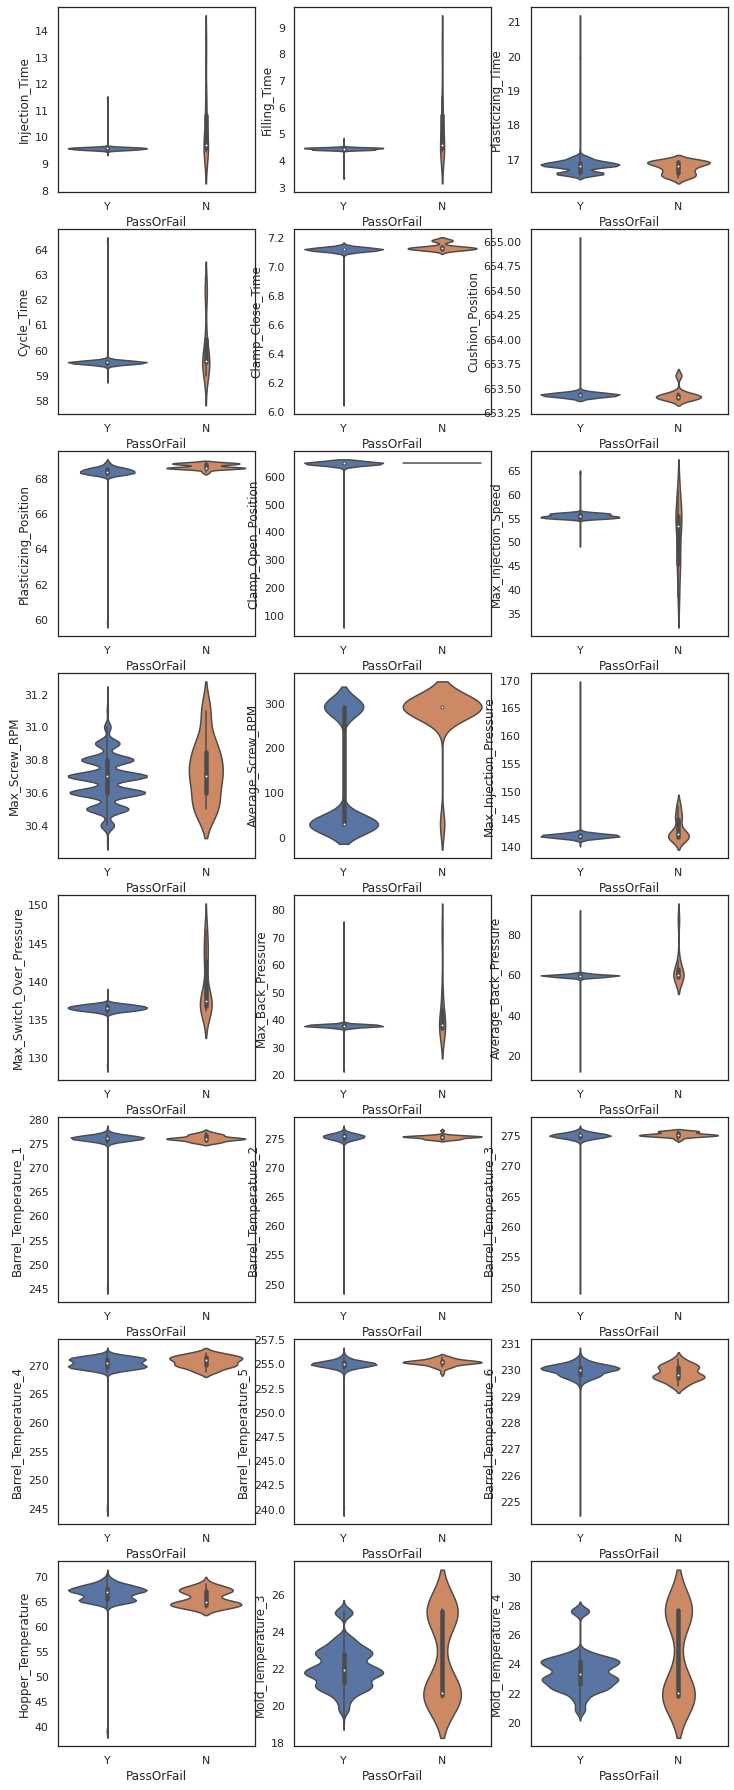

In [ ]:
draw_violin(CN7_boxplot)

### **라인플롯**

In [ ]:
def line_plot(data_P, data_F): 
    fig, ax = plt.subplots(6, 4, figsize=(16, 24))
    k = 0
    for i in range(6): # 24개 칼럼이니까 4개씩 6개
        for j in range(4):
            ax[i, j].plot(data_P[list(data_P)[k]], color='b')
            ax[i, j].plot(data_F[list(data_F)[k]], color='r')
            ax[i, j].legend(['PASS','FAIL'])
            ax[i, j].set_title(list(data_P)[k])
            k += 1
    plt.show()

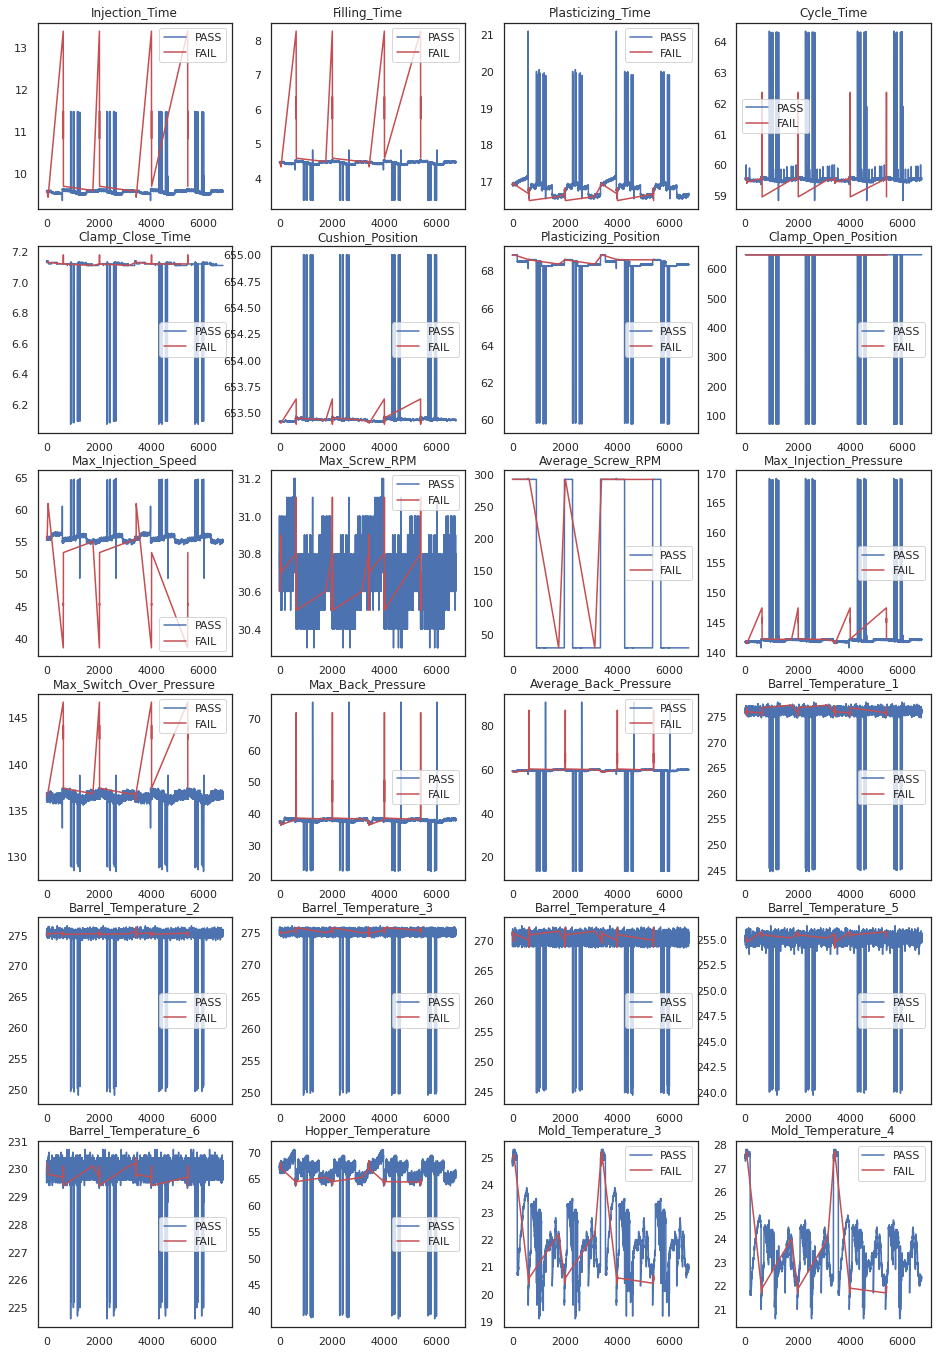

In [ ]:
line_plot(CN7_P_rev, CN7_F_rev)

*   x축은 데이터 행 순서, y축은 각 그래프 별 변수값이다. 데이터는 측정한 순서대로 축적되었기 때문에, 시간으로 볼 수 있다.
*   정상 데이터는 주기적으로 값이 급격하게 바뀐다. 변수 간 상관관계에 따라서 감소, 증가.
*   비정상 데이터는 불규칙적인 패턴을 보인다.





### **t-sne**

In [ ]:
CN7_2 = CN7.drop(['PART_NAME'], axis=1)
CN7_2_pca = CN7_2.replace('Y',0)
CN7_2_pca = CN7_2_pca.replace('N',1)
CN7_2_pca

,PassOrFail,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
0,0,9.60,4.48,16.910000,59.580002,7.13,653.409973,68.839996,647.98999,55.299999,30.799999,292.500000,141.800003,136.899994,37.500000,59.299999,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,67.199997,24.799999,27.600000
1,0,9.59,4.48,16.910000,59.560001,7.13,653.419983,68.839996,647.98999,55.299999,31.000000,292.500000,141.800003,136.800003,37.500000,59.299999,276.500000,275.000000,275.399994,271.100006,254.899994,230.000000,66.900002,25.000000,27.600000
2,0,9.58,4.46,16.900000,59.580002,7.13,653.409973,68.839996,647.98999,55.599998,30.900000,292.500000,141.699997,136.399994,37.700001,59.400002,276.299988,275.299988,275.200012,271.399994,255.000000,230.000000,67.500000,25.000000,27.600000
3,0,9.58,4.46,16.920000,59.560001,7.13,653.409973,68.849998,647.98999,55.500000,30.600000,292.399994,141.800003,136.699997,37.400002,59.299999,275.799988,275.399994,275.000000,271.299988,255.000000,230.000000,67.000000,25.000000,27.600000
4,0,9.57,4.45,16.910000,59.520000,7.14,653.409973,68.830002,647.98999,55.700001,30.799999,292.500000,141.600006,136.399994,37.099998,59.099998,275.700012,274.899994,274.799988,270.799988,255.399994,230.100006,66.699997,24.799999,27.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6731,0,9.58,4.46,16.670000,59.520000,7.11,653.429993,68.339996,647.98999,55.200001,30.600000,29.200001,142.199997,136.399994,37.900002,59.700001,275.799988,275.500000,275.500000,269.500000,255.000000,230.199997,66.000000,21.000000,22.400000
6732,0,9.60,4.49,16.650000,59.540001,7.11,653.429993,68.320000,647.98999,54.900002,30.799999,29.200001,142.100006,136.899994,38.099998,59.799999,276.100006,275.899994,274.899994,269.700012,254.600006,229.600006,65.400002,21.000000,22.400000
6733,0,9.60,4.48,16.620001,59.560001,7.11,653.429993,68.330002,647.98999,54.900002,30.700001,29.200001,142.100006,137.000000,38.299999,59.900002,276.500000,274.899994,275.100006,269.500000,255.600006,229.600006,66.099998,21.000000,22.400000
6734,0,9.60,4.48,16.650000,59.560001,7.11,653.429993,68.349998,647.98999,55.000000,30.700001,29.200001,142.100006,136.800003,38.400002,59.900002,275.799988,275.299988,275.500000,270.700012,254.899994,230.000000,66.099998,21.000000,22.400000


In [ ]:
vc = CN7_2_pca['PassOrFail'].value_counts().to_frame().reset_index()
vc['percent'] = vc["PassOrFail"].apply(lambda x : round(100*float(x) / len(CN7_2_pca), 2))
vc = vc.rename(columns = {"index" : "Target", "Class" : "Count"})
vc

,Target,PassOrFail,percent
0,0,6697,99.42
1,1,39,0.58


In [ ]:
X = CN7_2_pca.iloc[:, 1:]
y = CN7_2_pca.iloc[:, 0]
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (6736, 24)
Shape of y: (6736,)


In [ ]:
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split

print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

smote = ADASYN(random_state=2)
X_smote, y_smote = smote.fit_sample(X, y.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_smote.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_smote.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_smote==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_smote==0)))

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Before OverSampling, counts of label '1': 39
Before OverSampling, counts of label '0': 6697 

After OverSampling, the shape of train_X: (13396, 24)
After OverSampling, the shape of train_y: (13396,) 

After OverSampling, counts of label '1': 6699
After OverSampling, counts of label '0': 6697


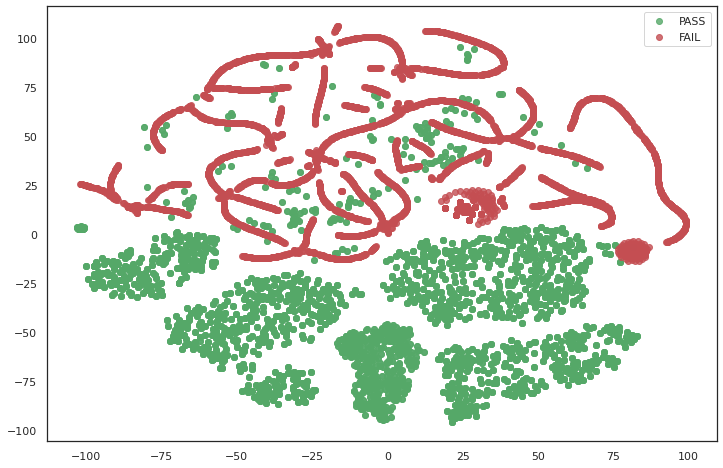

In [ ]:
from sklearn.manifold import TSNE

def tsne_plot(x1, y1):
  tsne = TSNE(n_components=2, random_state=0)
  X_t = tsne.fit_transform(x1)

  plt.figure(figsize=(12,8))
  plt.scatter(X_t[np.where(y1==0), 0], X_t[np.where(y1==0), 1],
              marker='o', color='g', linewidth='1', alpha=0.8, label='PASS')
  plt.scatter(X_t[np.where(y1==1), 0], X_t[np.where(y1==1),1],
              marker='o', color='r', linewidth='1', alpha=0.8, label='FAIL')
  plt.legend(loc='best')
  plt.show()

tsne_plot(X_smote, y_smote)

smote를 적용하여 비정상 데이터를 늘린 후 t-sne 시각화 적용.

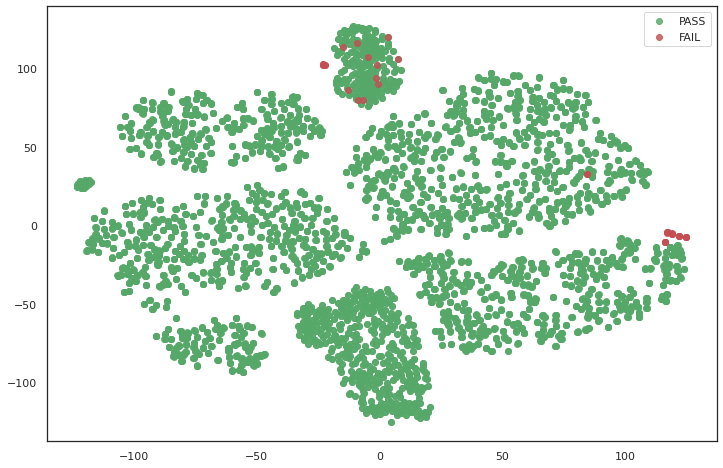

In [ ]:
tsne_plot(X,y)

smote를 적용하지 않고 t-sne 시각화를 해보았다. 비정상 데이터가 너무 적어 오히려 더 파악이 어려웠다.

앞에서 제거하기로 한 clamp close time과 average screw RPM 열을 제거한 후 smote를 적용한 데이터를 t-sne 시각화해보았다.

# 둘 다 제거

In [ ]:
CN7_preprocessing = CN7_2_pca.drop(['Clamp_Close_Time','Average_Screw_RPM'], axis=1)

In [ ]:
X = CN7_preprocessing.iloc[:, 1:]
y = CN7_preprocessing.iloc[:, 0]
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (6736, 22)
Shape of y: (6736,)


In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

smote = ADASYN(random_state=2)
X_smote, y_smote = smote.fit_sample(X, y.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_smote.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_smote.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_smote==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_smote==0)))

Before OverSampling, counts of label '1': 39
Before OverSampling, counts of label '0': 6697 

After OverSampling, the shape of train_X: (13392, 22)
After OverSampling, the shape of train_y: (13392,) 

After OverSampling, counts of label '1': 6695


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, counts of label '0': 6697


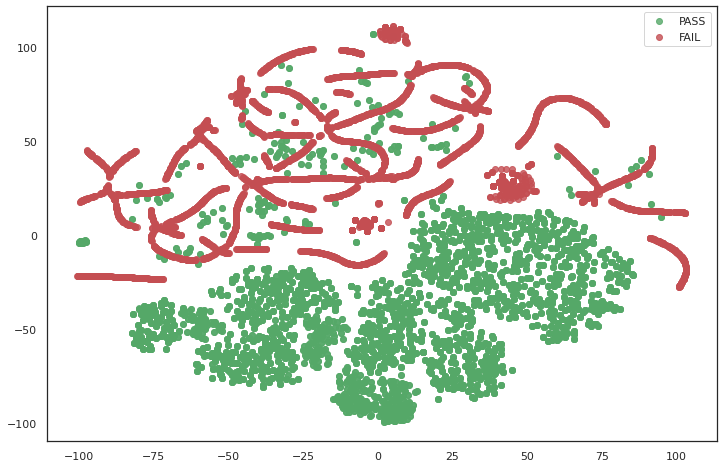

In [ ]:
tsne_plot(X_smote, y_smote)

각각 단일제거

In [ ]:
CN7_preprocessing2 = CN7_2_pca.drop(['Clamp_Close_Time'], axis=1)
X2 = CN7_preprocessing2.iloc[:, 1:]
y2 = CN7_preprocessing2.iloc[:, 0]
print('Shape of X: {}'.format(X2.shape))
print('Shape of y: {}'.format(y2.shape))

Shape of X: (6736, 23)
Shape of y: (6736,)


In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

smote = ADASYN(random_state=2)
X2_smote, y2_smote = smote.fit_sample(X2, y2.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X2_smote.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y2_smote.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y2_smote==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y2_smote==0)))

Before OverSampling, counts of label '1': 39
Before OverSampling, counts of label '0': 6697 

After OverSampling, the shape of train_X: (13396, 23)
After OverSampling, the shape of train_y: (13396,) 

After OverSampling, counts of label '1': 6699
After OverSampling, counts of label '0': 6697


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


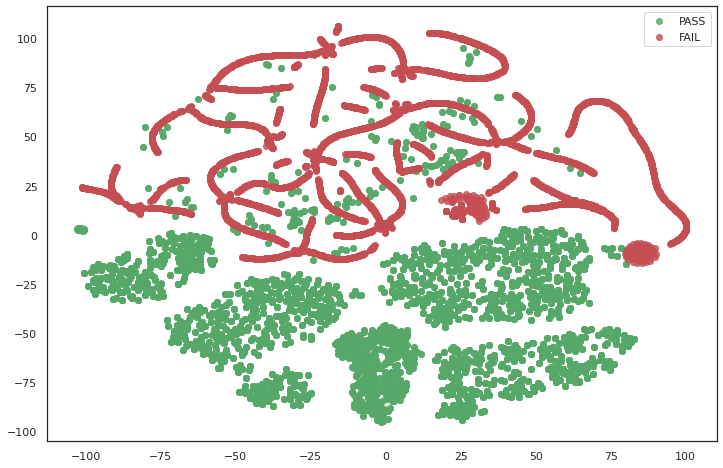

In [ ]:
tsne_plot(X2_smote, y2_smote)

In [ ]:
CN7_preprocessing3 = CN7_2_pca.drop(['Average_Screw_RPM'], axis=1)
X3 = CN7_preprocessing3.iloc[:, 1:]
y3 = CN7_preprocessing3.iloc[:, 0]
print('Shape of X: {}'.format(X3.shape))
print('Shape of y: {}'.format(y3.shape))

Shape of X: (6736, 23)
Shape of y: (6736,)


In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

smote = ADASYN(random_state=2)
X3_smote, y3_smote = smote.fit_sample(X3, y3.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X3_smote.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y3_smote.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y3_smote==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y3_smote==0)))

Before OverSampling, counts of label '1': 39
Before OverSampling, counts of label '0': 6697 

After OverSampling, the shape of train_X: (13392, 23)
After OverSampling, the shape of train_y: (13392,) 

After OverSampling, counts of label '1': 6695
After OverSampling, counts of label '0': 6697


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


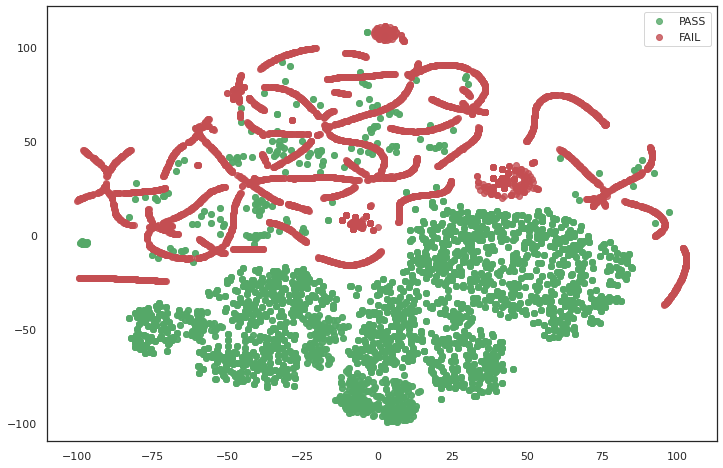

In [ ]:
tsne_plot(X3_smote, y3_smote)



*   정상 데이터는 몰려있는 반면, 비정상 데이터는 분산되어 있음.
*   정상 데이터와 비정상 데이터가 대부분 명확하게 구분되어 있지만, 오른쪽 상단 부분이 정상/비정상이 겹쳐있음.

*   **추가적인 feature 제거를 통해 tsne 시각화 진행**



